# Prerequisites

Un-archive the dataset :)

In [55]:
#!unzip archive.zip -d Data

# **1.1 Cerinta 1**

Pentru a facilita lucrul cu setul de date Brain Tumor Classification (MRI) in cadrul acestui proiect, implementati o clasa personalizata in PyTorch, derivata din torch.utils.data.Dataset, utilizand un mod de incarcare lazy (doar in momentul accesarii datelor). Aceasta va asigura ca datele sunt incarcate doar atunci cand este necesar, economisind astfel memorie. Aceasta clasa ar trebui sa:

*   Primeasca ca argument o cale de unde va prelua imaginile (train / test).

*   Clasa ar trebui sa ıncarce imaginile pe baza numelor fisierelor si a etichetelor asociate, fara a le pastra in memorie pana la momentul accesarii, pentru fiecare categorie (glioma tumor, meningioma tumor, no tumor, pituitary tumor) din directorul furnizat ca argument ın constructor.

*   Contina implementarea metodelor __len__ si __getitem__:
   *  __len__ – trebuie sa returneze numarul total de imagini din dataset
   * __getitem__ – trebuie sa incarce si sa returneze imaginea si eticheta corespunzatoare pe baza pozitiei ın lista de fisiere. De asemenea, daca avem
specificata o transformare, o va aplica ınainte de a returna imaginea.
Aceasta clasa va permite utilizarea setului de date ımpreuna cu DataLoader pentru ıncarcarea optimizata a datelor ın batch-uri, necesara pentru antrenarea si evaluarea modelului.


In [56]:
# the imports
import torch
from torch.utils.data import Dataset
from PIL import Image
import os
from torchvision import transforms
!pip install torchvision
import matplotlib.pyplot as plt


In [57]:
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
testing_path = 'Data/Testing/'
training_path = 'Data/Training/'

In [58]:
class BrainTumorDataset(Dataset):
    def __init__(self, data_paths, transform=None):
        self.data_paths = data_paths
        # If no transform is specified, use ToTensor
        if transform is None:
          self.transform = transforms.ToTensor()
        else:
          self.transform = transform
        self.image_paths = []
        self.labels = []

        for class_name in os.listdir(data_paths):
          #join the paths to make the whole path to the classes
          class_type_path = os.path.join(data_paths, class_name)
          if os.path.isdir(class_type_path):
              if class_name == 'glioma_tumor':
                label = labels[0]
              elif class_name == 'meningioma_tumor':
                label = labels[1]
              elif class_name == 'no_tumor':
                label = labels[2]
                # if we are on the training set, we'll double the no_tumor images
                if 'Training' in data_paths:
                  for image_name in os.listdir(class_type_path):
                    whole_image_path = os.path.join(class_type_path, image_name)
                    self.image_paths.append(whole_image_path)
                    self.labels.append(label)
              elif class_name == 'pituitary_tumor':
                label = labels[3]
              else:
                continue
              for image_name in os.listdir(class_type_path):
                  whole_image_path = os.path.join(class_type_path, image_name)
                  self.image_paths.append(whole_image_path)
                  self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, i):
        image_path = self.image_paths[i]
        image = Image.open(image_path)
        label = self.labels[i]
        # plt.imshow(image)
        # plt.title(f"Label: {label}")
        # plt.axis('off')
        # plt.show()
        if self.transform:
            image = self.transform(image)

        return image, label

# 1.2 Cerinta 2

Pentru a permite o evaluare robusta si generalizabila a modelului, implementati o metoda de impartire a setului de date de antrenare in doua subseturi: 80% pentru antrenare si 20% pentru validare. Aceasta metoda ar trebui sa fie flexibila, pentru a putea fi utilizata
ulterior intr-o strategie de tip cross-validation.


In [59]:
import random
from sklearn.model_selection import train_test_split

def split_data_by_class(dataset):
    train_image_paths = []
    train_labels = []
    val_image_paths = []
    val_labels = []

    image_paths = dataset.image_paths
    all_labels = dataset.labels

    for class_index, class_name in enumerate(labels):
        # get the indices of images that are in the current class
        indices = [i for i, label in enumerate(all_labels) if label == class_name]
        class_image_paths = [image_paths[i] for i in indices]

        # shuffle la imaginile din clasa respectiva (se face pt fiecare clasa din labels)
        random.shuffle(class_image_paths)

        #split using train_test_split function (lab 5)
        X_train, X_val = train_test_split(class_image_paths, test_size=0.2, random_state=42)

        # Append to train and validation lists
        train_image_paths.extend(X_train)
        train_labels.extend([class_index] * len(X_train))

        val_image_paths.extend(X_val)
        val_labels.extend([class_index] * len(X_val))

    return train_image_paths, train_labels, val_image_paths, val_labels

# get the number of training images and validation img
training_dataset = BrainTumorDataset(training_path)
train_image_paths, train_labels, val_image_paths, val_labels = split_data_by_class(training_dataset)
print("Number of training images:", len(train_image_paths))
print("Number of validation images:", len(val_image_paths))
print(train_image_paths)
print(train_labels)
print(val_image_paths)
print(val_labels)

Number of training images: 2610
Number of validation images: 655
['Data/Training/glioma_tumor/gg (41).jpg', 'Data/Training/glioma_tumor/gg (298).jpg', 'Data/Training/glioma_tumor/gg (489).jpg', 'Data/Training/glioma_tumor/gg (73).jpg', 'Data/Training/glioma_tumor/gg (359).jpg', 'Data/Training/glioma_tumor/gg (566).jpg', 'Data/Training/glioma_tumor/gg (13).jpg', 'Data/Training/glioma_tumor/gg (270).jpg', 'Data/Training/glioma_tumor/gg (387).jpg', 'Data/Training/glioma_tumor/gg (754).jpg', 'Data/Training/glioma_tumor/gg (414).jpg', 'Data/Training/glioma_tumor/gg (635).jpg', 'Data/Training/glioma_tumor/gg (383).jpg', 'Data/Training/glioma_tumor/gg (12).jpg', 'Data/Training/glioma_tumor/gg (276).jpg', 'Data/Training/glioma_tumor/gg (786).jpg', 'Data/Training/glioma_tumor/gg (117).jpg', 'Data/Training/glioma_tumor/gg (43).jpg', 'Data/Training/glioma_tumor/gg (82).jpg', 'Data/Training/glioma_tumor/gg (683).jpg', 'Data/Training/glioma_tumor/gg (787).jpg', 'Data/Training/glioma_tumor/gg (752).

# 1.3 Cerinta 3

Realizati o vizualizare a distributiei claselor (ex. histograme sau grafice de bare) pentru a determina daca setul de date este echilibrat sau dezechilibrat intre categoriile de tumori. Veti realiza acest lucru pentru fiecare dintre cele 3 seturi de date: antrenare, validare si
testare.

Daca sunt observate clase sub-reprezentate, documentati aceste observatii in raportul realizat pentru aceasta etapa.

De asemenea, propuneti variante pe baza carora putem remedia aceste situatii, cum ar fi augmentarea datelor sau alte tehnici utilizate pentru echilibrarea claselor.

Testing Class Distribution


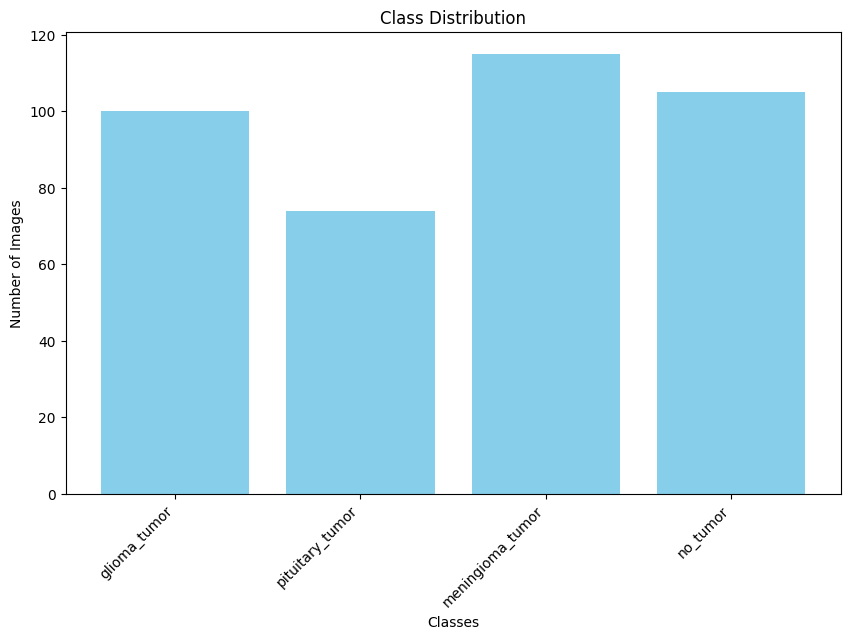

Training Class Distribution


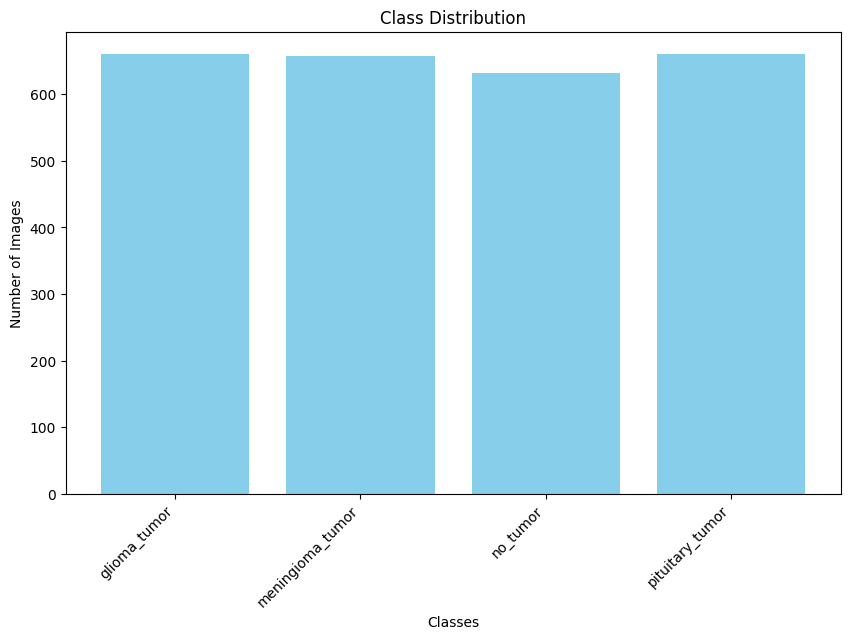

Validation Class Distribution


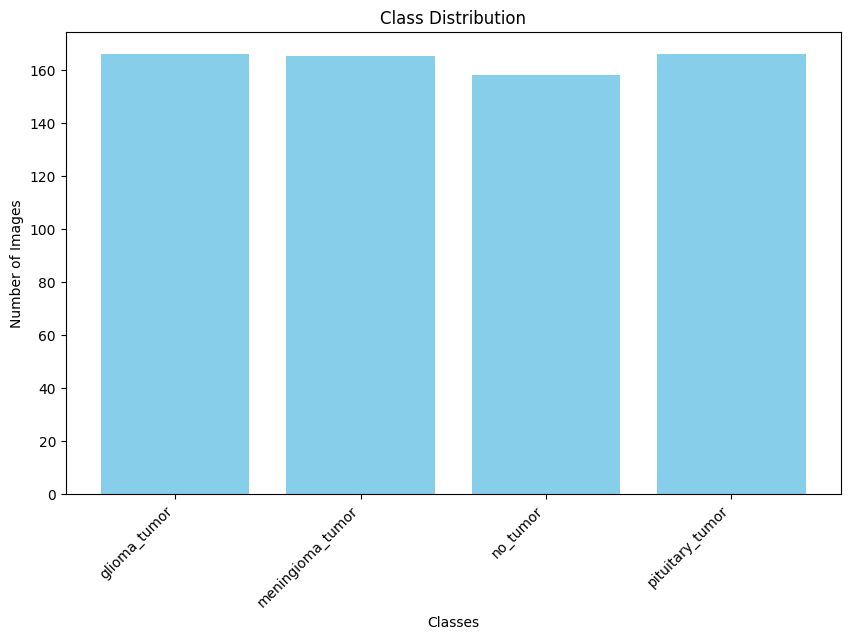

In [60]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_class_distribution(dataset_labels):
  label_counts = Counter(dataset_labels)
  plot_labels = []
  plot_counts = []

  # Print the counts for each label
  for label, count in label_counts.items():
      plot_labels.append(label)
      plot_counts.append(count)
  # print(plot_labels)
  # print(plot_counts)


  plt.figure(figsize=(10, 6))
  plt.bar(plot_labels, plot_counts, color='skyblue')
  plt.title("Class Distribution")
  plt.xlabel("Classes")
  plt.ylabel("Number of Images")
  plt.xticks(rotation=45, ha="right")

  plt.show()

# plot for testing dataset
testing_dataset = BrainTumorDataset(testing_path)

print("Testing Class Distribution")
plot_class_distribution(testing_dataset.labels)

# get validation/training datasets
training_dataset = BrainTumorDataset(training_path)

train_image_paths, train_labels, val_image_paths, val_labels = split_data_by_class(training_dataset)

#make train/val labels from numbers back to names

train_labels = [labels[label] for label in train_labels]
val_labels = [labels[label] for label in val_labels]

# plot training datasets
print("Training Class Distribution")
plot_class_distribution(train_labels)

# plot validation datasets
print("Validation Class Distribution")
plot_class_distribution(val_labels)


# 1.4 Cerinta 4

Pentru a intelege mai bine variabilitatea si tiparele vizuale ale fiecarei categorii de tumori cerebrale din setul de date Brain Tumor Classification (MRI), este necesara o analiza vizuala detaliata a imaginilor.

Extrageti si afisati un set de imagini din fiecare categorie prezenta in dataset (glioma tumor, meningioma tumor, no tumor, pituitary tumor), de preferat 5-10 imagini per categorie.

Astfel, putem incerca sa observam in mod direct caracteristicile fiecarui tip de tumora si variatiile intre imagini (daca ele exista).

In urma analizei vizuale, documentati in raportul realizat pentru aceasta etapa variabilitatea interna din cadrul fiecarei clase (de exemplu, tumorile gliomice pot varia ca forma si textura). Notati si cazurile in care imaginile sunt similare intre clase, ceea ce ar putea indica o dificultate mai mare pentru modelul de clasificare.

Examinati imaginile selectate pentru a identifica diferentele vizuale intre categorii (unele tumori pot aparea mai luminoase sau mai intunecate in functie de localizare si natura tesutului afectat).

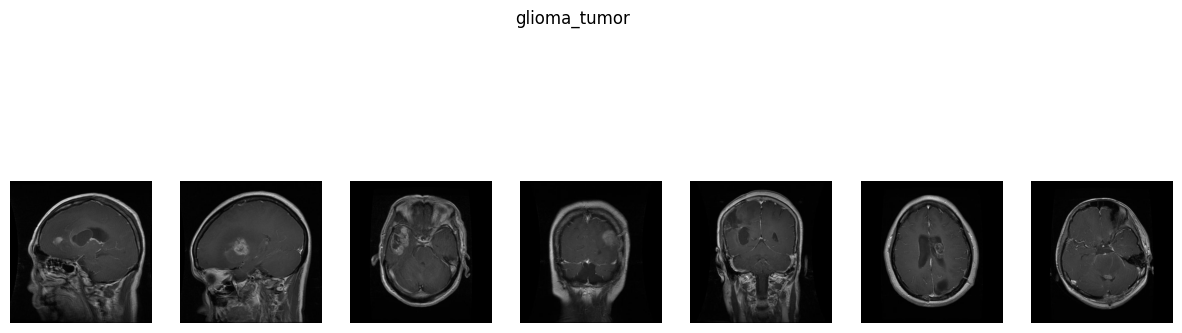

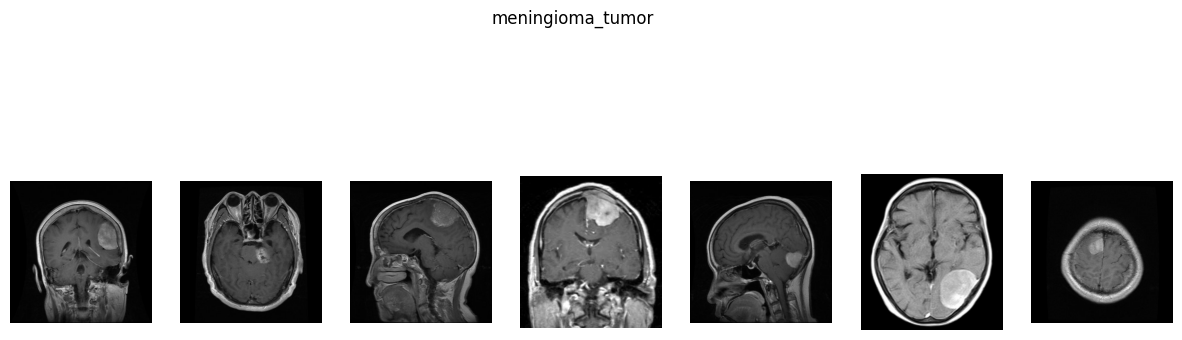

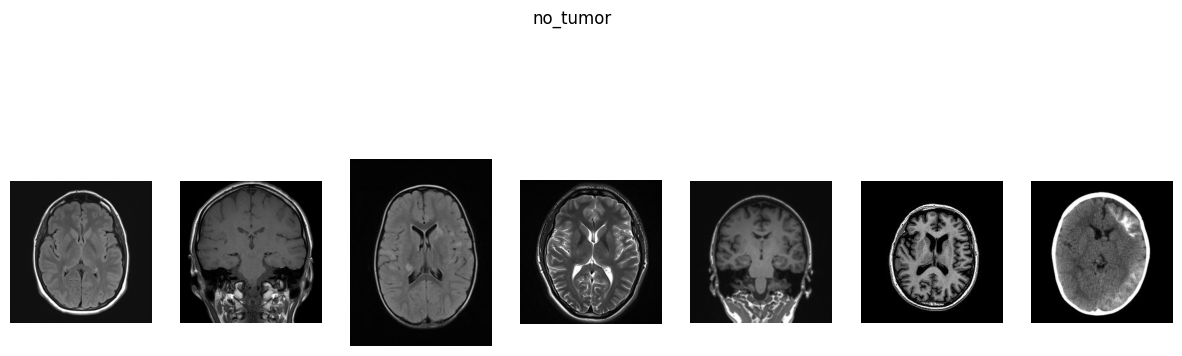

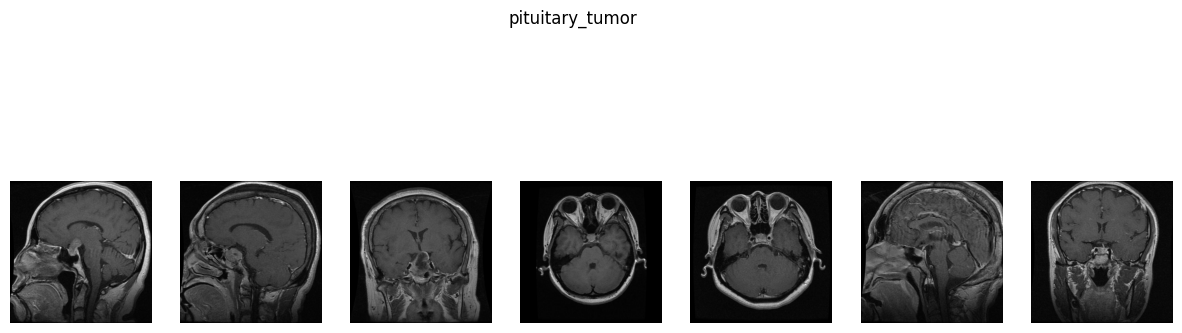

In [61]:

import os
import matplotlib.pyplot as plt
from PIL import Image

def print_images_by_class(data_path, class_name):
  num_of_images = 7
  image_paths = []
  class_type_path = os.path.join(data_path, class_name)
  for image_name in os.listdir(class_type_path):
    if len(image_paths) < num_of_images:
      whole_image_path = os.path.join(class_type_path, image_name)
      image_paths.append(whole_image_path)
    else:
      break

  fig, axes = plt.subplots(1, num_of_images, figsize=(15, 5))
  fig.suptitle(class_name)

  for i in range(len(image_paths)):
    image_path = image_paths[i]
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')


# print 7 images from gliomas tumor
print_images_by_class(training_path,labels[0])

# print 7 images from meningioma tumor
print_images_by_class(training_path,labels[1])

# print  images from no_tumor tumor
print_images_by_class(training_path,labels[2])

# print 7 images from pituitary tumor
print_images_by_class(training_path,labels[3])




# 1.5 Cerinta 5

Pentru a asigura consistenta si integritatea setului de date, implementati o verificare detaliata pentru fiecare imagine din setul de date, avand in vedere urmatoarele criterii:
*  Verificati daca toate imaginile au acelasi numar de canale (de exemplu, imagini in alb-negru vor avea un singur canal, in timp ce imaginile color vor avea 3 canale RGB). In cazul in care identificati imagini cu numar diferit de canale, gasiti o modalitate prin care sa asigurati o uniformizare din acest aspect.
*  Asigurati-va ca toate imaginile au dimensiuni uniforme (de exemplu, 256 × 256
pixeli). Imaginile de dimensiuni diferite pot introduce dificultati n procesul de antrenare a modelului. Daca identificati ca exista imagini de dimensiuni diferite, realizati o statistica si apoi aplicati o modalitate pentru uniformizarea dimensiunilor.
*  Verificati daca valorile pixelilor sunt exprimate pe aceleasi scale sau unitati (de exemplu, densitatea de protoni in imaginile MRI). Asigurati-va ca imaginile sunt normalizate corespunzator, astfel incat modelele de invatare automata sa poata interpreta valorile corect.


In raportul final, includeti concluziile la care ati ajuns dupa analizarea aspectelor legate de consistenta setului de date. Descrieti problemele identificate si detaliati procesarile aplicate pentru a rezolva aceste probleme.

In [62]:
import numpy as np

def check_image_consistency(dataset):
  nrRGB = 0
  nr_GreyScale = 0
  dim_image_dictionary = {}
  pixels = []

  for image_path in dataset.image_paths:
    image = Image.open(image_path)
    image_dim = image.size
    #check if image is rgb or greyscale
    if image.mode == 'L': #greyscale
      nr_GreyScale += 1
    else:
      nrRGB += 1
    # dictionar pt toate dimensiunile
    if image_dim in dim_image_dictionary.keys():
      dim_image_dictionary[image_dim] += 1
    else:
      dim_image_dictionary[image_dim] = 1

    image_np = np.array(image)
    # o medie a pixelilor per imagine
    pixel_mean = np.mean(image_np)
    pixels.append(pixel_mean)
    # print(f'Image has media {pixel_mean} number')
    # un check sa vedem imaginile ori cu media cea mai mica ori cum media cea mai mare
    # if pixel_mean > 137:
    #   plt.imshow(image)
    #   plt.title(f"Imagine cu media pixelilor mai mica de 10")
    #   plt.axis('off')
    #   plt.show()



  # transformarile pt size
  transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Resize((60, 60))
  ])
  print(f'There are {nrRGB} images with RGB')
  print(f'There are {nr_GreyScale} images with GreyScale')
  print(f'Image size is: {dim_image_dictionary}')

  # vedem minimul si maximul din media pixelilor tuturor imaginilor
  pixels_min = np.min(pixels)
  pixels_max = np.max(pixels)
  print(f'Cea mai mare media a pixelilor a unei imagini este {pixels_max}')
  print(f'Cea mai mica media a pixelilor a unei imagini este {pixels_min}')


  # dataset + transform
  dataset_with_transform = BrainTumorDataset(dataset.data_paths, transform=transform)

  return dataset_with_transform


print("training dataset")
training_dataset = BrainTumorDataset(training_path)
training_dataset_processed = check_image_consistency(training_dataset)

print("testing dataset")
testing_dataset = BrainTumorDataset(testing_path)
testing_dataset_processed = check_image_consistency(testing_dataset)

training dataset
There are 3265 images with RGB
There are 0 images with GreyScale
Image size is: {(512, 512): 2314, (256, 256): 16, (202, 202): 1, (474, 474): 2, (721, 903): 1, (502, 502): 1, (470, 432): 1, (940, 900): 1, (1280, 1280): 1, (360, 378): 1, (900, 741): 1, (442, 442): 25, (400, 400): 1, (1365, 1365): 1, (685, 681): 1, (201, 210): 1, (367, 395): 1, (528, 581): 1, (204, 249): 1, (215, 234): 1, (230, 241): 1, (306, 306): 1, (290, 342): 1, (250, 270): 1, (226, 223): 1, (180, 218): 1, (200, 223): 2, (272, 331): 1, (554, 554): 2, (219, 234): 1, (455, 500): 3, (341, 395): 2, (534, 674): 1, (206, 249): 1, (290, 339): 1, (295, 394): 1, (330, 355): 1, (366, 395): 1, (257, 248): 1, (369, 395): 1, (369, 398): 1, (214, 216): 1, (229, 223): 1, (201, 251): 13, (491, 624): 1, (300, 345): 1, (825, 993): 1, (305, 337): 1, (286, 356): 1, (200, 236): 1, (507, 340): 1, (351, 398): 1, (343, 367): 1, (262, 308): 1, (306, 365): 1, (210, 240): 2, (214, 235): 1, (298, 354): 1, (341, 372): 1, (278, 3

# 1.6 Cerinta 6

Pentru a creste calitatea si consistenta datelor de intrare, implementati sau selectati o serie de minimum 5 operatii de preprocesare si normalizare care pot fi aplicate imaginilor MRI din acest set de date. Dupa aplicarea fiecarei operatii, comparati imaginile
rezultate cu cele originale pentru a intelege impactul vizual al fiecarei transformari.

Alegeti tehnici precum filtrul Gaussian, normalizarea intensitatii, ajustarea contrastului (ex. CLAHE) si filtrele de detectie a marginilor (ex. Sobel). Pentru fiecare tehnica aleasa precizati in raport care este necesitatea sa pentru acest tip de imagistica
si efectul asteptat asupra datelor.


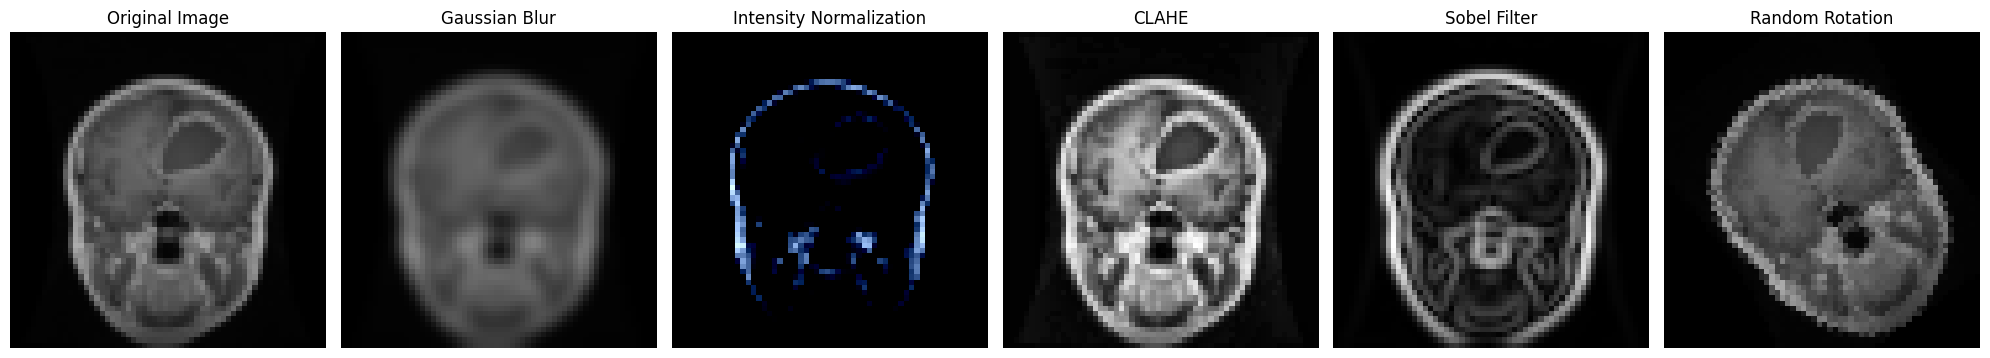

In [63]:
from torchvision.transforms import v2
import cv2

def filtru_Gaussian(image):
  blurrer = v2.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 3.))
  new_image = blurrer(image)

  new_image_np = new_image.permute(1, 2, 0).numpy()

  return new_image_np

def norm_intensity(image):
  norm = v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

  new_image = norm(image)
  new_image_np = new_image.permute(1, 2, 0).numpy()

  return new_image_np

def clahe(image):
  clh = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

  new_image_np = image.permute(1, 2, 0).numpy()

  if new_image_np.ndim == 3:
    new_image_np = cv2.cvtColor(new_image_np, cv2.COLOR_RGB2GRAY)

  new_image_np = (new_image_np * 255).astype('uint8')
  new_image = clh.apply(new_image_np)

  return new_image

def sobel(image):
  image_np = image.permute(1, 2, 0).numpy()
  image_gray = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)
  sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=5)
  sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=5)

  new_image = np.sqrt(sobel_x**2 + sobel_y**2)

  return new_image

def randomRot(image):
  rotate = transforms.RandomRotation(degrees=(0, 180))
  new_image = rotate(image)

  new_image_np = new_image.permute(1, 2, 0).numpy()

  return new_image_np

  plt.imshow(new_image_np, cmap='gray')
  plt.title("Imagine cu Random Rotation")
  plt.axis('off')
  plt.show()



image,label = training_dataset_processed.__getitem__(10)
# show original image
new_image_np = image.permute(1, 2, 0).numpy()

gaus_img = filtru_Gaussian(image)
norm_img = norm_intensity(image)
clahe_img = clahe(image)
sobel_img = sobel(image)
randomRot_img = randomRot(image)


fig, axes = plt.subplots(1, 6, figsize=(20, 5))  # 1 row, 6 columns for 5 transformations + original

axes[0].imshow(new_image_np)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(gaus_img, cmap='gray')
axes[1].set_title("Gaussian Blur")
axes[1].axis('off')

axes[2].imshow(norm_img)
axes[2].set_title("Intensity Normalization")
axes[2].axis('off')

axes[3].imshow(clahe_img, cmap='gray')
axes[3].set_title("CLAHE")
axes[3].axis('off')

axes[4].imshow(sobel_img, cmap='gray')
axes[4].set_title("Sobel Filter")
axes[4].axis('off')

axes[5].imshow(randomRot_img)
axes[5].set_title("Random Rotation")
axes[5].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()




# 1.7 Cerinta 7
Implementati un pipeline de antrenare a unei retele neurale folosind Pytorch / MONAI pentru clasificarea imaginilor din setul de date Brain Tumor Classification (MRI). Pipelineul ar trebui sa includa urmatoarele etape:
1. Incarcarea datelor: Utilizati clasa derivata din Dataset pentru a citi si prelucra imaginile din setul de date, asigurandu-va ca aplicati operatiile de preprocesare necesare.
2. Definirea modelului: Alegeti sau construiti o arhitectura de retea neurala adecvata pentru sarcina de clasificare, precum reteaua convolutionala (CNN) prezentata la curs.
3. Definirea functiei de pierdere si a optimizatorului: Selectati o functie de
pierdere potrivita si un optimizator pentru antrenarea modelului.
4. Antrenarea modelului: Implementati un ciclu de antrenare care sa efectueze
epoci multiple, sa actualizeze ponderile modelului si sa evalueze performanta pe
setul de validare dupa fiecare epoca. Salvati modelul care obtine cele mai bune
performante pe setul de validare ın timpul antrenarii.
5. Evaluarea modelului: Dupa antrenare, evaluati modelul pe setul de test pentru
a determina: acuratetea, precizie, recall, F1-score. De asemenea, construiti si
plotati matricea de confuzie.


Implementati si antrenati un model de baza (baseline) pentru clasificarea tumorilor cerebrale folosind setul de date propus. Un baseline este esential deoarece ne ofera un punct de plecare pentru evaluarea performantei modelului, ajutandu-ne sa ıntelegem cat de bine functioneaza solutia noastra initiala. In etapa urmatoare, ne vom concentra pe ımbunatatirea acestui model de baza, explorand tehnici avansate de optimizare si ajustare a hiperparametrilor pentru a spori acuratetea si eficienta clasificarii.
In raport, veti include detaliile legate de procesul de antrenare (modelul neural folosit, functia de eroare, numarul de epoci, optimizatorul folosit, rata de ınvatare si alte aspecte considerate relevante). De asemenea, trebuie sa realizati un grafic ın care sa evidentiati care este evolutia erorii pentru setul de antrenare si pentru setul de validare de la o epoca la alta. Un grafic similar va trebui sa realizati si pentru a arata cum evolueaza acuratetea de la o epoca la alta pentru setul de date de antrenare si pentru setul de date
de validare.

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm
import copy

In [65]:
# 1. Incarcarea datelor
batch_size = 32
from torch.utils.data import Subset, DataLoader

# se iau training si validation image paths prin functia split_data_by_class
train_image_paths, train_labels, val_image_paths, val_labels = split_data_by_class(training_dataset_processed)

# fac un dictionary mapping cu image paths indicii lor din dataset
image_path_to_index = {path: i for i, path in enumerate(training_dataset_processed.image_paths)}

# indicii de training si validation
train_indices = [image_path_to_index[path] for path in train_image_paths]
val_indices = [image_path_to_index[path] for path in val_image_paths]

# subseturi pt training si validation
train_subset = Subset(training_dataset_processed, train_indices)
val_subset = Subset(training_dataset_processed, val_indices)

# creare dataloaders pt training si validation
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

#creare dataloaders pt test
test_loader = DataLoader(testing_dataset_processed, batch_size=batch_size, shuffle=False)


In [66]:
# 2. Definirea modelului
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 15 * 15, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 32 * 15 * 15)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

In [67]:
# functii ajutatoare din lab ul Notiuni Fundamentale de ML

def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

def loss_batch(loss_func, output, target, opt=None):

    loss = loss_func(output, target)
    pred = output.argmax(dim=1, keepdim=True)
    metric_b=pred.eq(target.view_as(pred)).sum().item()

    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b

def loss_epoch(model,loss_func,dataset_dl,opt=None):

    run_loss=0.0
    t_metric=0.0
    len_data=len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        xb=xb.to(device)
        yb=yb.to(device)
        output=model(xb)
        loss_b,metric_b=loss_batch(loss_func, output, yb, opt)
        run_loss+=loss_b

        if metric_b is not None:
            t_metric+=metric_b

    loss=run_loss/float(len_data)
    metric=t_metric/float(len_data)

    return loss, metric

In [68]:
# 4. Antrenarea modelului
def Train_Val(model, params, verbose=False):
    epochs = params["epochs"]
    loss_func = params["f_loss"]
    opt = params["optimiser"]
    train_dl = params["train"]
    val_dl = params["val"]
    lr_scheduler = params["lr_change"]
    weight_path = params["weight_path"]

    loss_history = {"train": [], "val": []}
    metric_history = {"train": [], "val": []}
    best_model_wts = copy.deepcopy(model.state_dict())
    best_accuracy = 0.0

    for epoch in range(epochs):
        current_lr = get_lr(opt)
        if verbose:
            print(f"Epoch {epoch+1}/{epochs}, current lr={current_lr:.6e}")

        # faza de antrenare
        model.train()
        train_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for images, labels_ in train_dl:
            images, labels_ = images.to(device), torch.tensor([labels.index(label) for label in labels_]).to(device)

            opt.zero_grad()
            outputs = model(images)
            loss = loss_func(outputs, labels_)
            loss.backward()
            opt.step()

            train_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            correct_predictions += (preds == labels_).sum().item()
            total_samples += labels_.size(0)

        epoch_train_loss = train_loss / total_samples
        epoch_train_acc = correct_predictions / total_samples
        loss_history["train"].append(epoch_train_loss)
        metric_history["train"].append(epoch_train_acc)

        # faza validare
        model.eval()
        val_loss = 0.0
        correct_val_predictions = 0
        total_val_samples = 0

        with torch.no_grad():
            for images, labels_ in val_dl:
                images, labels_ = images.to(device), torch.tensor([labels.index(label) for label in labels_]).to(device)

                outputs = model(images)
                loss = loss_func(outputs, labels_)
                val_loss += loss.item() * images.size(0)
                _, preds = torch.max(outputs, 1)
                correct_val_predictions += (preds == labels_).sum().item()
                total_val_samples += labels_.size(0)

        epoch_val_loss = val_loss / total_val_samples
        epoch_val_acc = correct_val_predictions / total_val_samples
        loss_history["val"].append(epoch_val_loss)
        metric_history["val"].append(epoch_val_acc)

        if epoch_val_acc > best_accuracy:
            best_accuracy = epoch_val_acc
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), weight_path)
            if verbose:
                print("Copied best model weights!")

        lr_scheduler.step(epoch_val_loss)

        if verbose:
            print(f"Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_acc:.4f}")
            print(f"Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_acc:.4f}")
            print("-" * 30)

    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history

In [69]:
# 3. Definirea functiei de pierdere si a optimizatorului
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN(num_classes=4).to(device)
# parametrii
params_train = {
    "train": train_loader,
    "val": val_loader,
    "epochs": 10,
    "optimiser": optim.Adam(model.parameters(), lr=0.001),
    "lr_change": ReduceLROnPlateau(
        optim.Adam(model.parameters(), lr=0.001),
        mode='min',
        factor=0.5,
        patience=2,
        verbose=1
    ),
    "f_loss": nn.CrossEntropyLoss(),
    "weight_path": "best_model.pth",
}

trained_model, train_loss_history, train_metric_history = Train_Val(model, params_train, verbose=True)

# Print final metrics and loss history
print("\nTraining complete.")
print(f"Training Loss History: {train_loss_history['train']}")
print(f"Validation Loss History: {train_loss_history['val']}")
print(f"Training Accuracy History: {train_metric_history['train']}")
print(f"Validation Accuracy History: {train_metric_history['val']}")

Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.9407, Train Accuracy: 0.6130
Val Loss: 0.8462, Val Accuracy: 0.6611
------------------------------
Epoch 2/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6449, Train Accuracy: 0.7479
Val Loss: 0.5915, Val Accuracy: 0.7756
------------------------------
Epoch 3/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.5226, Train Accuracy: 0.7897
Val Loss: 0.5254, Val Accuracy: 0.7832
------------------------------
Epoch 4/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.4433, Train Accuracy: 0.8333
Val Loss: 0.4668, Val Accuracy: 0.8061
------------------------------
Epoch 5/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.3715, Train Accuracy: 0.8605
Val Loss: 0.5086, Val Accuracy: 0.8076
------------------------------
Epoch 6/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.3348, Train Accuracy: 0.8697
Val Loss: 0.40

In [70]:
# small summary of every layer
from torchsummary import summary
summary(model,input_size=(3, 60, 60),device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 60, 60]             448
              ReLU-2           [-1, 16, 60, 60]               0
         MaxPool2d-3           [-1, 16, 30, 30]               0
            Conv2d-4           [-1, 32, 30, 30]           4,640
              ReLU-5           [-1, 32, 30, 30]               0
         MaxPool2d-6           [-1, 32, 15, 15]               0
            Linear-7                  [-1, 128]         921,728
              ReLU-8                  [-1, 128]               0
            Linear-9                    [-1, 4]             516
Total params: 927,332
Trainable params: 927,332
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.04
Forward/backward pass size (MB): 1.49
Params size (MB): 3.54
Estimated Total Size (MB): 5.06
-------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.86      0.18      0.30       100
meningioma_tumor       0.69      0.78      0.73       115
        no_tumor       0.58      0.98      0.73       105
 pituitary_tumor       0.79      0.68      0.73        74

        accuracy                           0.66       394
       macro avg       0.73      0.65      0.62       394
    weighted avg       0.72      0.66      0.62       394



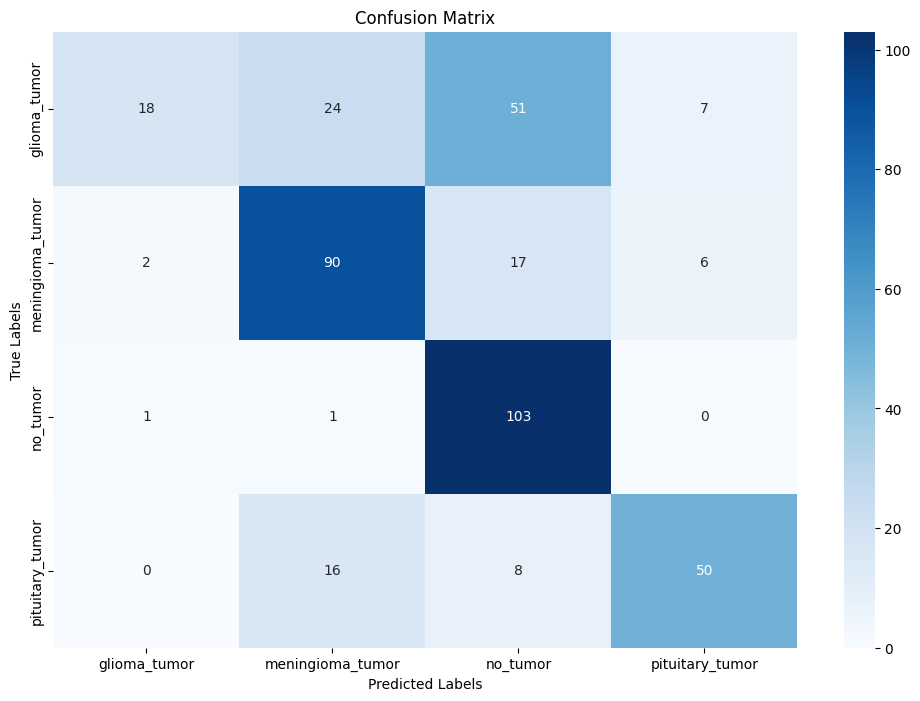

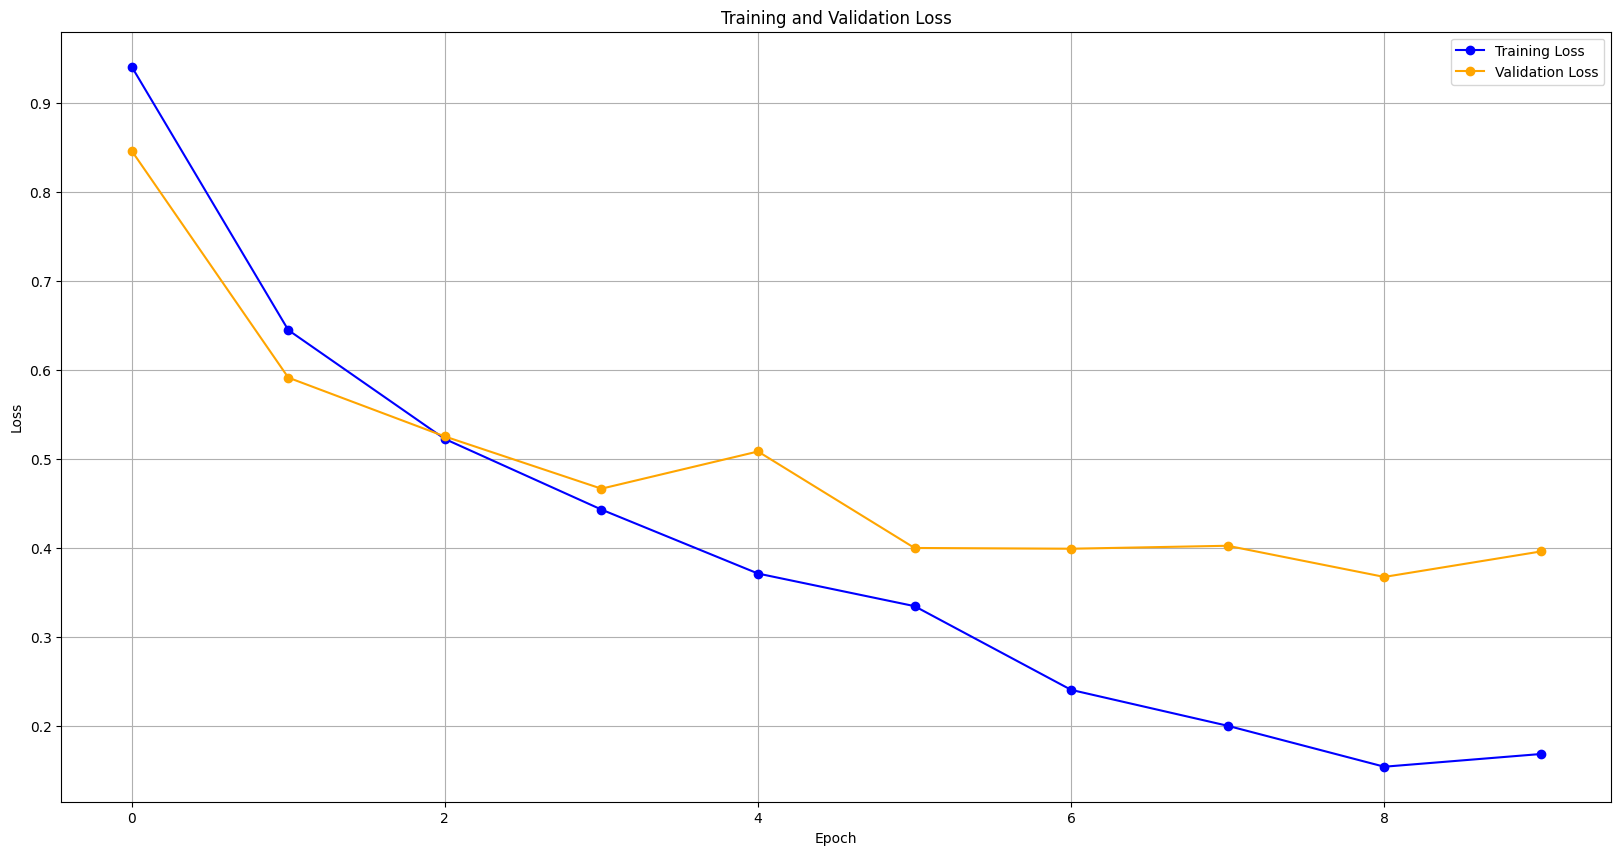

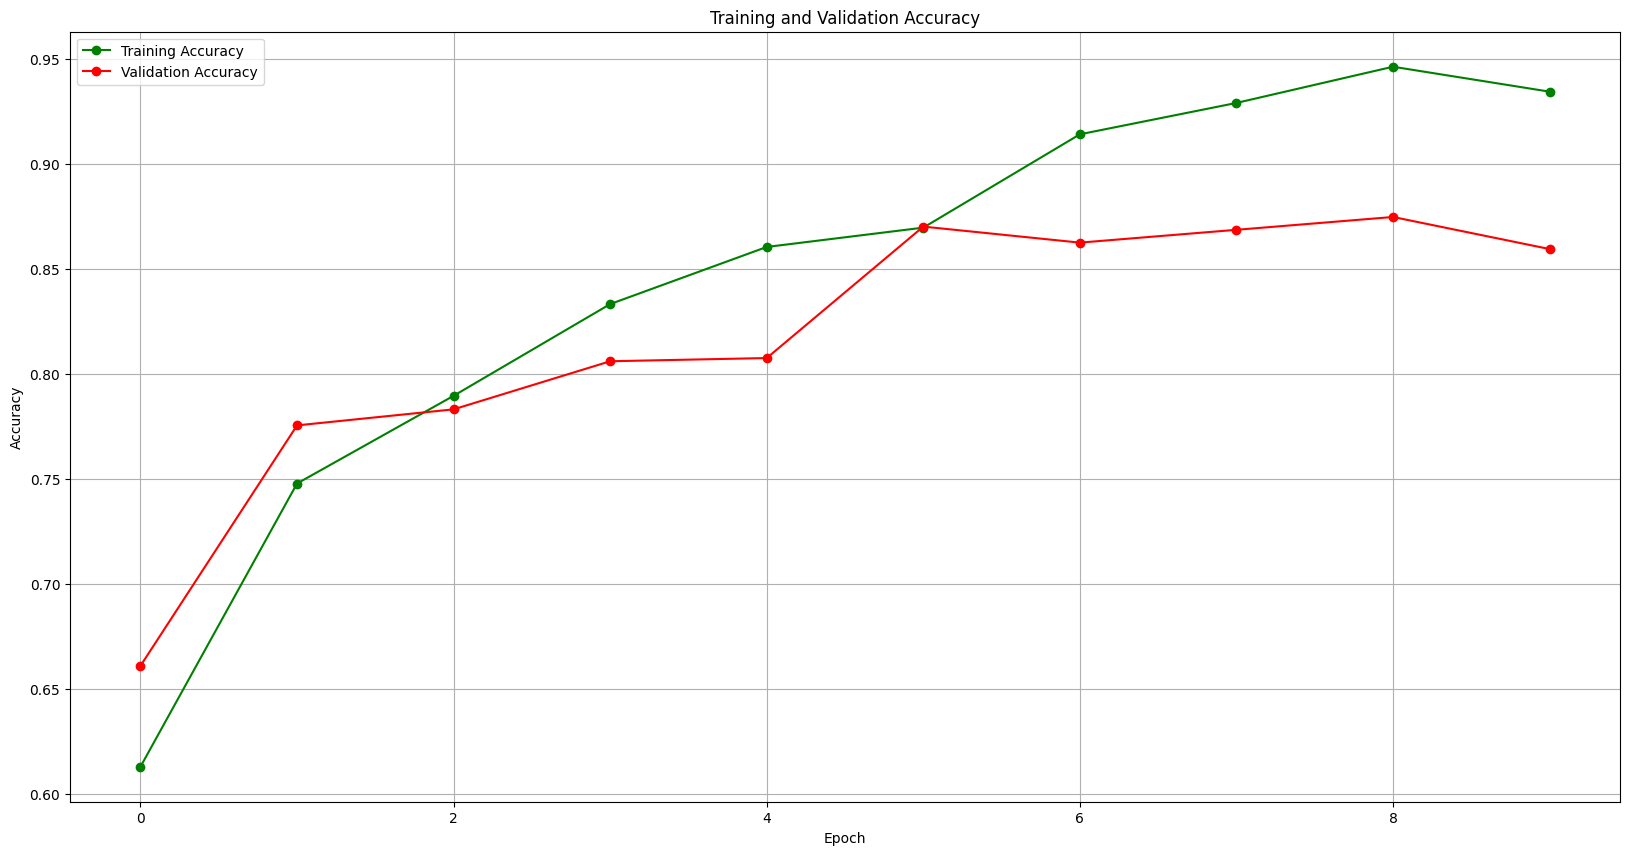

In [71]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Evaluează modelul pe setul de test
trained_model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels_ in test_loader:
        images = images.to(device)
        labels_ = torch.tensor([labels.index(label) for label in labels_]).to(device)
        outputs = trained_model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels_.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# raport de clasificare
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

# Construiește matricea de confuzie
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

train_losses = train_loss_history["train"]
val_losses = train_loss_history["val"]
train_accuracies = train_metric_history["train"]
val_accuracies = train_metric_history["val"]

# loss la antrenare și validare
plt.figure(figsize=(20, 10))
plt.plot(train_losses, label='Training Loss', color='blue', marker='o')
plt.plot(val_losses, label='Validation Loss', color='orange', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()

# accuracy  antrenare și validare
plt.figure(figsize=(20, 10))
plt.plot(train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot(val_accuracies, label='Validation Accuracy', color='red', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Accuracy')
plt.show()


# 2.1 Cerinta 1
Pentru a facilita evaluarea robusta si a asigura capacitatea de generalizare a modelului neural propus ın cadrul acestui proiect, adaptati pipeline-ul de antrenare pentru a integra validarea de tip k-fold cross-validation (de exemplu, k=5). Acest proces presupune ımpartirea setului de date de antrenare ın k subseturi egale, fiecare subset fiind utilizat pe rand pentru validare, ın timp ce celelalte k-1 subseturi sunt utilizate pentru antrenare.


Pipeline-ul trebuie sa includa urmatoarele componente:

- Implementati o metoda de ımpartire a datelor care sa distribuie echitabil exemplele ıntre cele k fold-uri, pastrand proportiile claselor din setul de date original.
- Pentru fiecare fold:
 - Antrenati modelul folosind subseturile de date corespunzatoare pentru antrenare si validare.
 - Generati si salvati ploturi care ilustreaza evolutia pierderii (loss) si a acuratetei (accuracy) pentru seturile de antrenare si validare, pentru fiecare epoca.
 - Evaluati performanta pe setul de testare (independent de fold-uri) utilizand
urmatoarele metrici: Precision, Recall, F1-Score si Accuracy.
- Dupa finalizarea tuturor fold-urilor:
 - Calculati media si deviatia standard pentru fiecare metrica (Precision, Recall, F1-Score, Accuracy) pe toate fold-urile, atat pentru validare, cat si pentru testare.
 - Documentati si prezentati aceste valori ıntr-un tabel, care sa permita o comparatie clara ıntre fold-uri si sa ofere o perspectiva agregata asupra performantei modelului.


Acest proces va permite o estimare mai precisa a performantei modelului si va reduce influenta eventualelor dezechilibre sau particularitati din seturile de date. In raportul final, discutati concluziile rezultate si observatiile privind stabilitatea si generalizarea modelului.

Pentru k veti folosi valoarea 5. Setul folosit la antrenare va avea o proportie de 80% si cel pentru validare va avea o proportie de 20%.

Fold 1/5
Epoch 1/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 1.2129, Train Accuracy: 0.5062
Val Loss: 1.0402, Val Accuracy: 0.5728
------------------------------
Epoch 2/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.8758, Train Accuracy: 0.6695
Val Loss: 0.7886, Val Accuracy: 0.6762
------------------------------
Epoch 3/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.7344, Train Accuracy: 0.7193
Val Loss: 0.7209, Val Accuracy: 0.7165
------------------------------
Epoch 4/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.6743, Train Accuracy: 0.7294
Val Loss: 0.7091, Val Accuracy: 0.7356
------------------------------
Epoch 5/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.6164, Train Accuracy: 0.7605
Val Loss: 0.6419, Val Accuracy: 0.7414
------------------------------
Epoch 6/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.5780, Train Accuracy: 0.7835
Val L

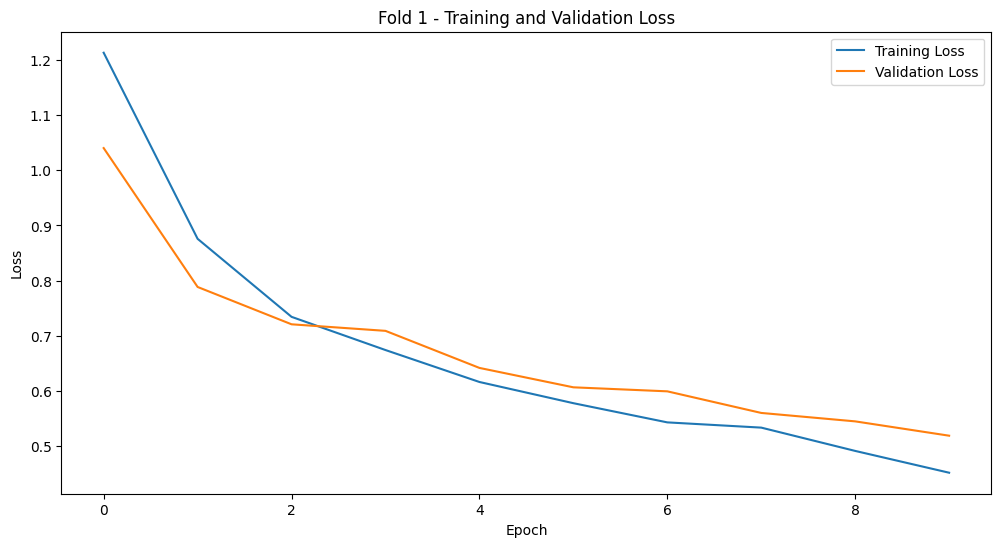

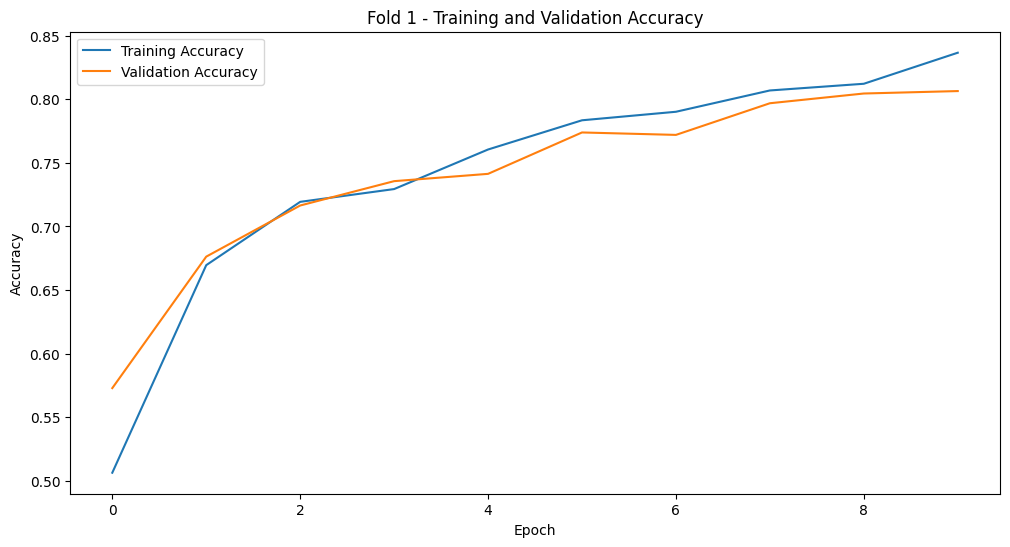

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.25      0.02      0.04       100
meningioma_tumor       0.16      0.09      0.11       115
        no_tumor       0.25      0.71      0.37       105
 pituitary_tumor       0.42      0.14      0.20        74

        accuracy                           0.25       394
       macro avg       0.27      0.24      0.18       394
    weighted avg       0.26      0.25      0.18       394



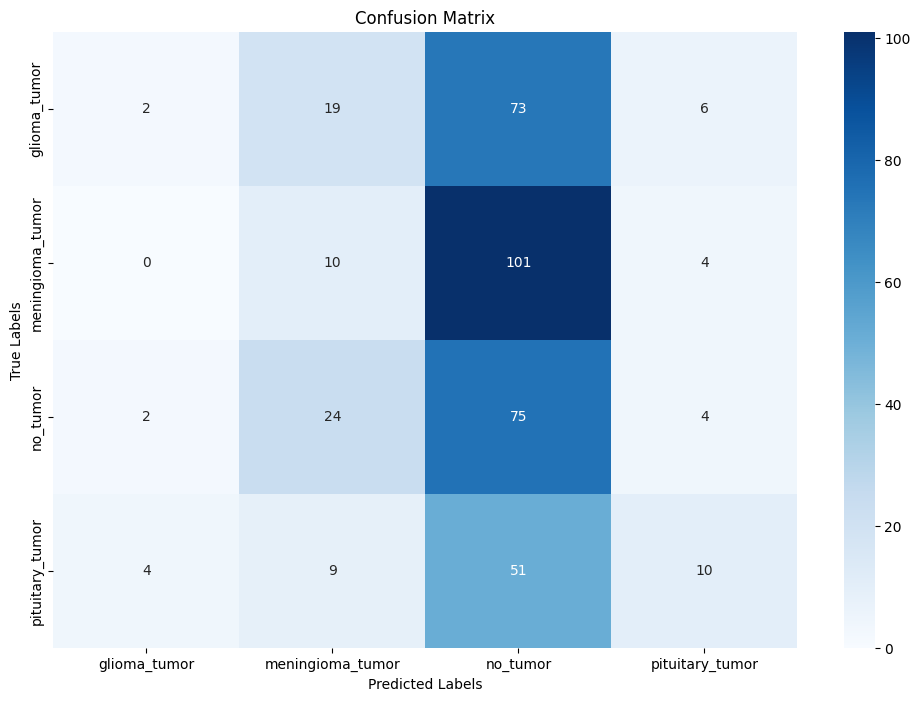

Fold 2/5
Epoch 1/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 1.1825, Train Accuracy: 0.5254
Val Loss: 0.9642, Val Accuracy: 0.5670
------------------------------
Epoch 2/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.8854, Train Accuracy: 0.6451
Val Loss: 0.7328, Val Accuracy: 0.7203
------------------------------
Epoch 3/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.7610, Train Accuracy: 0.6940
Val Loss: 0.6538, Val Accuracy: 0.7375
------------------------------
Epoch 4/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.6888, Train Accuracy: 0.7237
Val Loss: 0.5991, Val Accuracy: 0.7969
------------------------------
Epoch 5/10, current lr=3.000000e-04
Train Loss: 0.6310, Train Accuracy: 0.7591
Val Loss: 0.5839, Val Accuracy: 0.7663
------------------------------
Epoch 6/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.6024, Train Accuracy: 0.7653
Val Loss: 0.5301, Val Accuracy: 

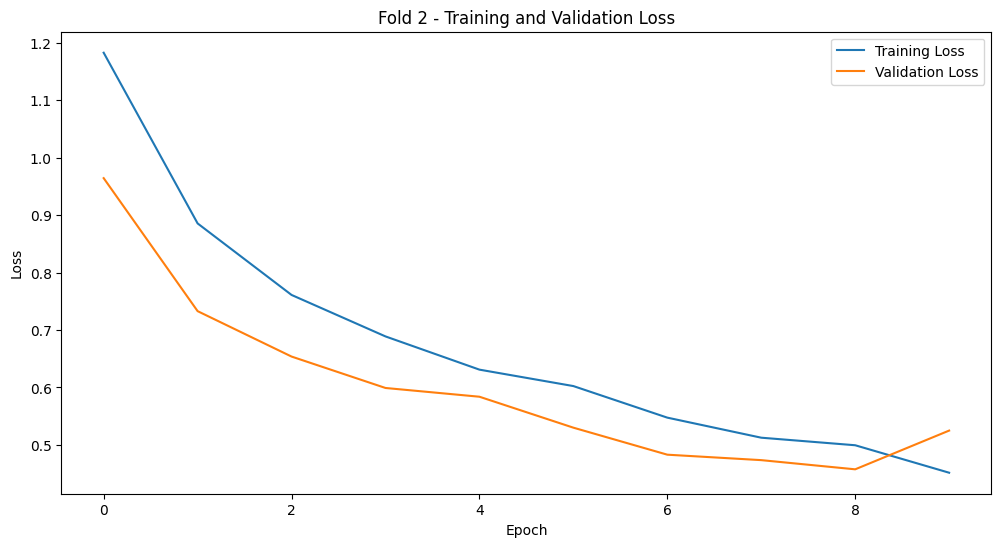

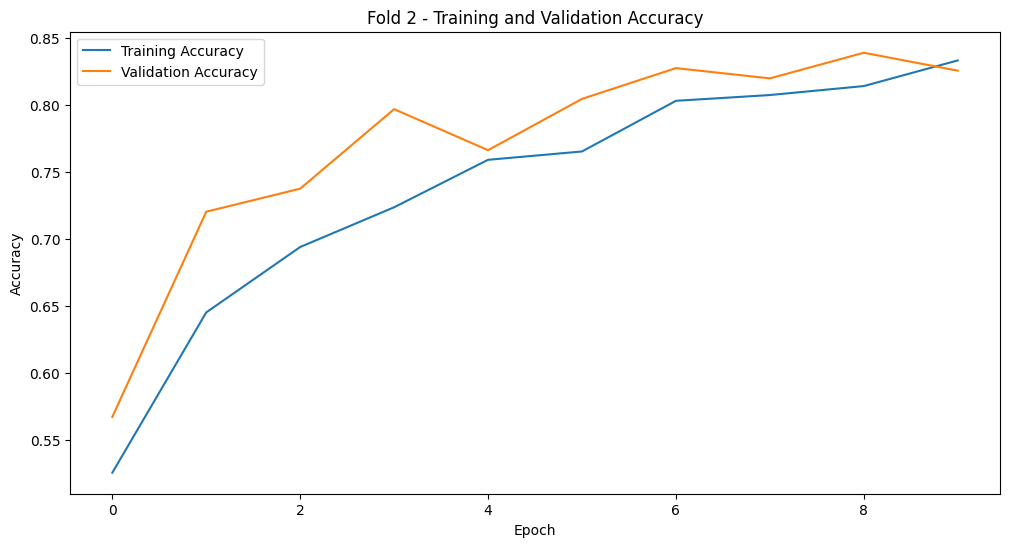

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.25      0.02      0.04       100
meningioma_tumor       0.16      0.09      0.11       115
        no_tumor       0.25      0.71      0.37       105
 pituitary_tumor       0.42      0.14      0.20        74

        accuracy                           0.25       394
       macro avg       0.27      0.24      0.18       394
    weighted avg       0.26      0.25      0.18       394



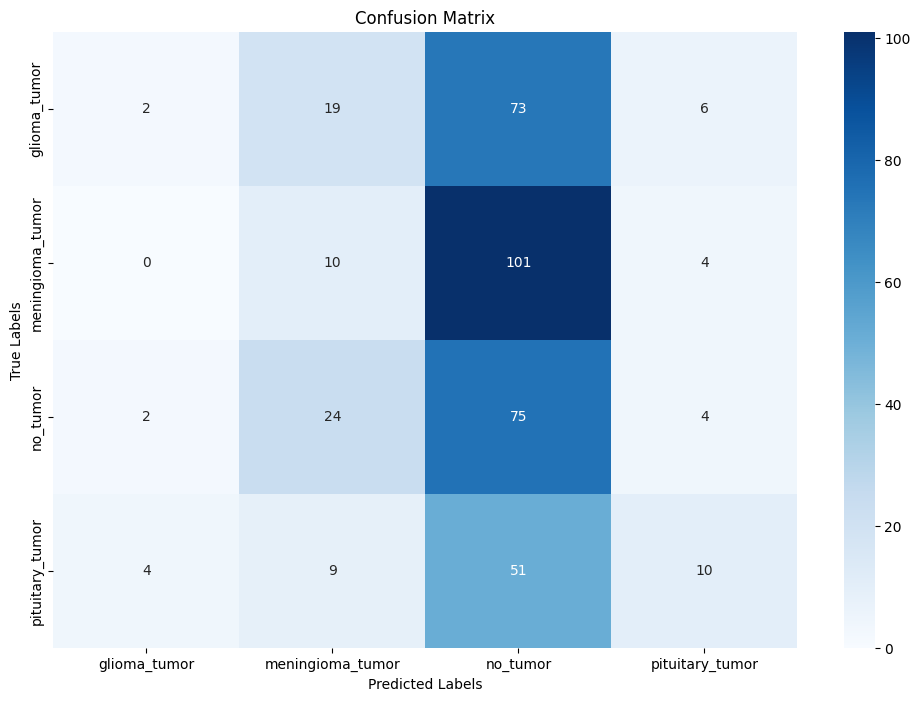

Fold 3/5
Epoch 1/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 1.1456, Train Accuracy: 0.5168
Val Loss: 0.9209, Val Accuracy: 0.6513
------------------------------
Epoch 2/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.8334, Train Accuracy: 0.6724
Val Loss: 0.7812, Val Accuracy: 0.7088
------------------------------
Epoch 3/10, current lr=3.000000e-04
Train Loss: 0.7174, Train Accuracy: 0.7141
Val Loss: 0.7024, Val Accuracy: 0.7088
------------------------------
Epoch 4/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.6401, Train Accuracy: 0.7447
Val Loss: 0.6747, Val Accuracy: 0.7605
------------------------------
Epoch 5/10, current lr=3.000000e-04
Train Loss: 0.5878, Train Accuracy: 0.7763
Val Loss: 0.6388, Val Accuracy: 0.7471
------------------------------
Epoch 6/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.5463, Train Accuracy: 0.7874
Val Loss: 0.6054, Val Accuracy: 0.7816
--------------------

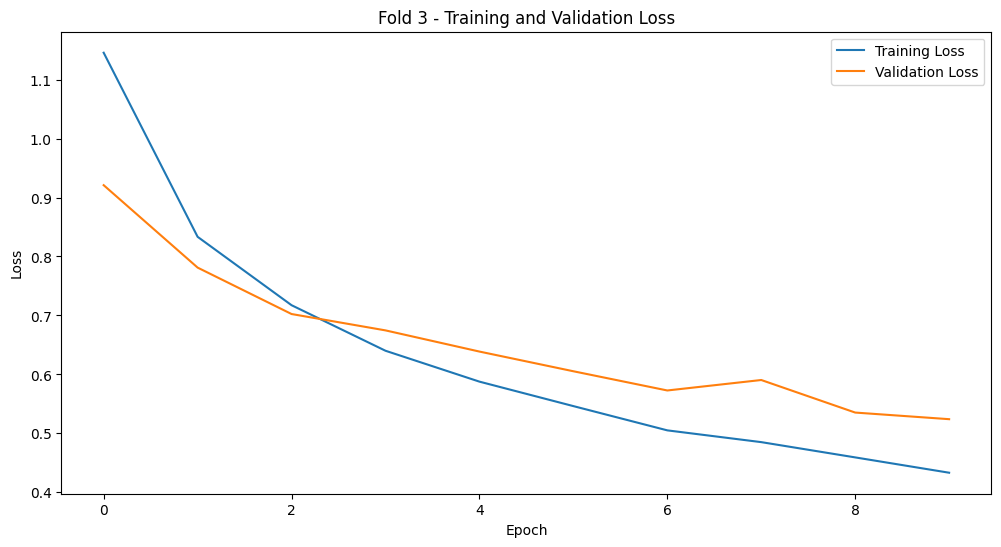

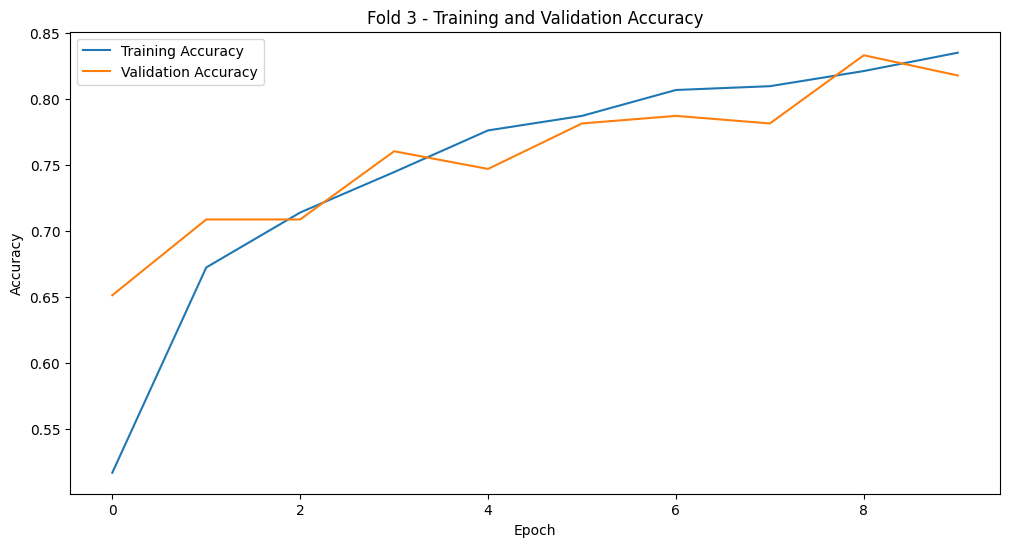

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.25      0.02      0.04       100
meningioma_tumor       0.16      0.09      0.11       115
        no_tumor       0.25      0.71      0.37       105
 pituitary_tumor       0.42      0.14      0.20        74

        accuracy                           0.25       394
       macro avg       0.27      0.24      0.18       394
    weighted avg       0.26      0.25      0.18       394



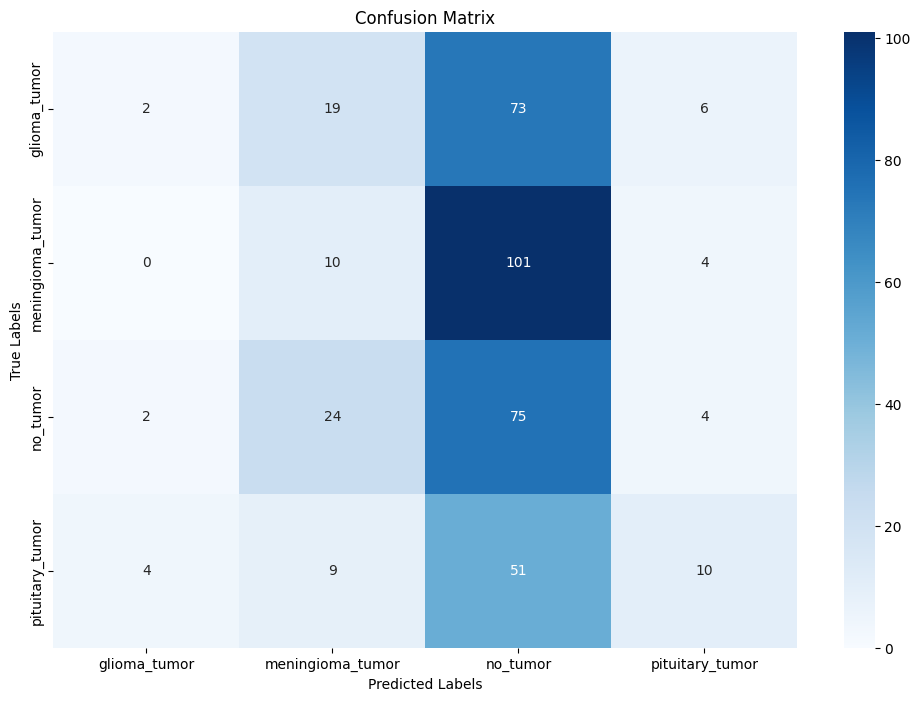

Fold 4/5
Epoch 1/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 1.2391, Train Accuracy: 0.4449
Val Loss: 1.0207, Val Accuracy: 0.5805
------------------------------
Epoch 2/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.8911, Train Accuracy: 0.6504
Val Loss: 0.8234, Val Accuracy: 0.6437
------------------------------
Epoch 3/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.7385, Train Accuracy: 0.7050
Val Loss: 0.7186, Val Accuracy: 0.7165
------------------------------
Epoch 4/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.6658, Train Accuracy: 0.7399
Val Loss: 0.6709, Val Accuracy: 0.7318
------------------------------
Epoch 5/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.6175, Train Accuracy: 0.7615
Val Loss: 0.6188, Val Accuracy: 0.7548
------------------------------
Epoch 6/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.5733, Train Accuracy: 0.7792
Val L

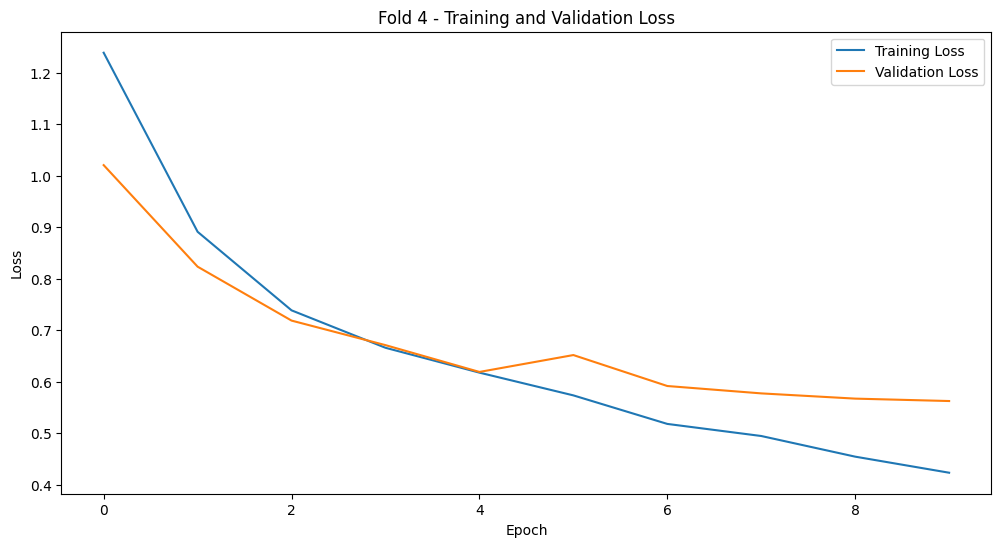

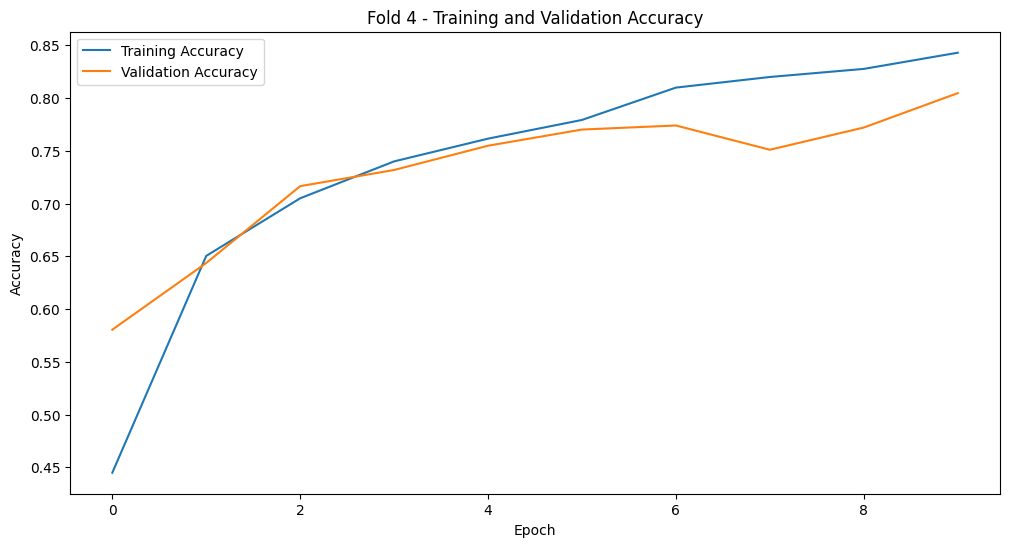

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.25      0.02      0.04       100
meningioma_tumor       0.16      0.09      0.11       115
        no_tumor       0.25      0.71      0.37       105
 pituitary_tumor       0.42      0.14      0.20        74

        accuracy                           0.25       394
       macro avg       0.27      0.24      0.18       394
    weighted avg       0.26      0.25      0.18       394



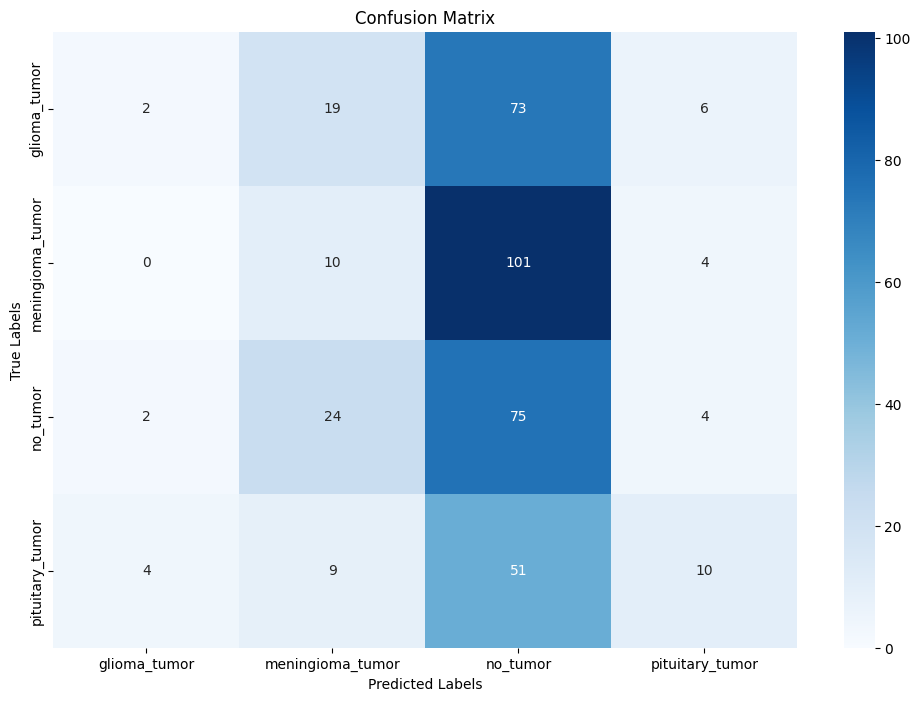

Fold 5/5
Epoch 1/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 1.2284, Train Accuracy: 0.4670
Val Loss: 1.0147, Val Accuracy: 0.6360
------------------------------
Epoch 2/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.8933, Train Accuracy: 0.6422
Val Loss: 0.8298, Val Accuracy: 0.6418
------------------------------
Epoch 3/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.7656, Train Accuracy: 0.6949
Val Loss: 0.7638, Val Accuracy: 0.6648
------------------------------
Epoch 4/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.6849, Train Accuracy: 0.7265
Val Loss: 0.7158, Val Accuracy: 0.7299
------------------------------
Epoch 5/10, current lr=3.000000e-04
Copied best model weights!
Train Loss: 0.6254, Train Accuracy: 0.7615
Val Loss: 0.6551, Val Accuracy: 0.7337
------------------------------
Epoch 6/10, current lr=3.000000e-04
Train Loss: 0.5867, Train Accuracy: 0.7744
Val Loss: 0.6473, Val Accuracy: 

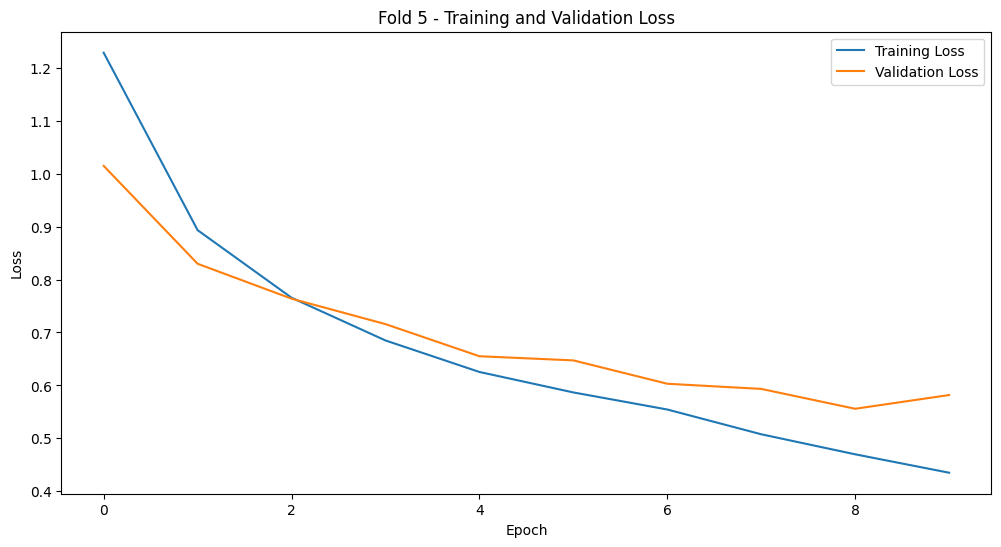

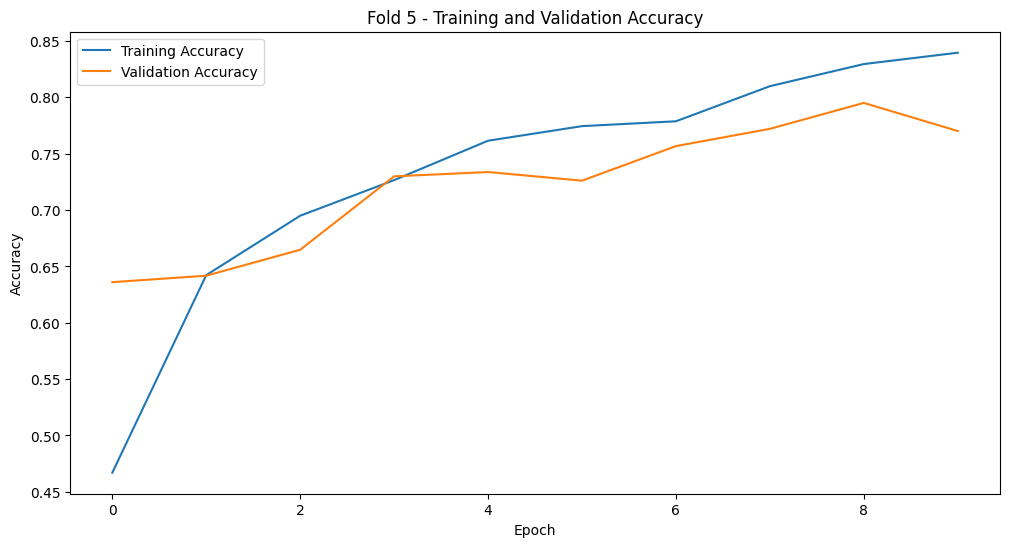

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.25      0.02      0.04       100
meningioma_tumor       0.16      0.09      0.11       115
        no_tumor       0.25      0.71      0.37       105
 pituitary_tumor       0.42      0.14      0.20        74

        accuracy                           0.25       394
       macro avg       0.27      0.24      0.18       394
    weighted avg       0.26      0.25      0.18       394



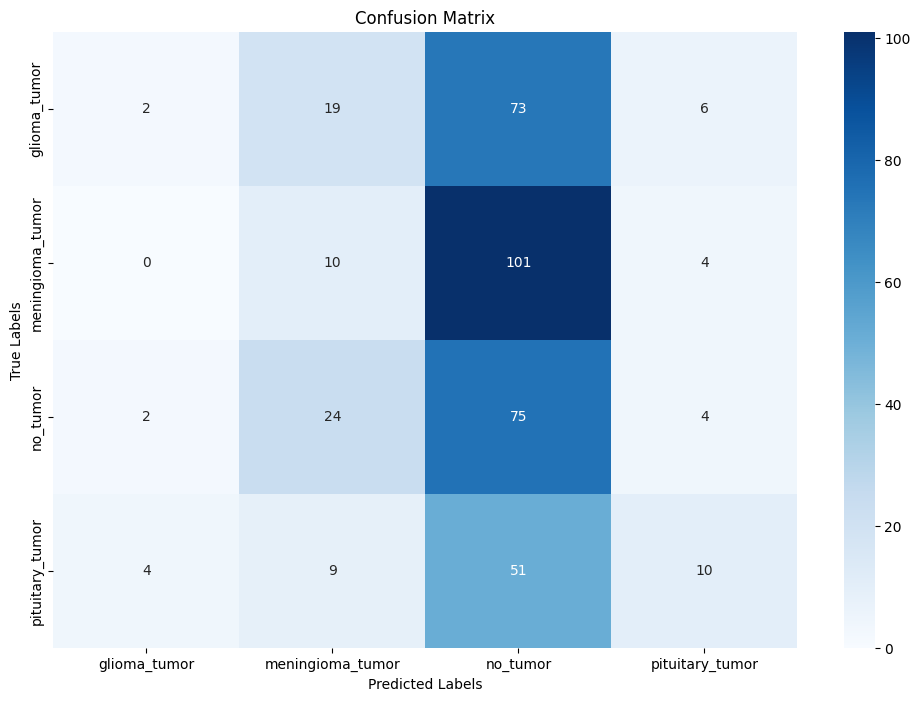

Precision - Mean: 0.8152, Std: 0.0165
Recall - Mean: 0.8157, Std: 0.0173
F1_score - Mean: 0.8128, Std: 0.0171
Accuracy - Mean: 0.8157, Std: 0.0173
This is the worst accuracy for fold5: 0.7950191570881227


In [93]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
import numpy as np
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import StratifiedKFold

# implementare k-fold cross-validation
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
worst_accuracy = 10;

# indicii pentru image_paths de antrenare și labels
train_image_paths, train_labels, val_image_paths, val_labels = split_data_by_class(training_dataset_processed)
image_path_to_index = {path: i for i, path in enumerate(training_dataset_processed.image_paths)}
data_indices = [image_path_to_index[path] for path in train_image_paths]
data_labels = train_labels

fold_metrics = {
    "precision": [],
    "recall": [],
    "f1_score": [],
    "accuracy": []
}

fold_results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(data_indices, data_labels)):
    print(f"Fold {fold + 1}/{k}")

    # creare subset și dataLoader pentru antrenare și validare
    train_subset = Subset(training_dataset_processed, [data_indices[i] for i in train_idx])
    val_subset = Subset(training_dataset_processed, [data_indices[i] for i in val_idx])

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    # antrenare model
    model = SimpleCNN(num_classes=4).to(device)
    params_train = {
        "train": train_loader,
        "val": val_loader,
        "epochs": 10,
        "optimiser": torch.optim.Adam(model.parameters(), lr=3e-4),
        "lr_change": torch.optim.lr_scheduler.ReduceLROnPlateau(
            torch.optim.Adam(model.parameters(), lr=3e-4),
            mode='min',
            factor=0.5,
            patience=2,
            verbose=1
        ),
        "f_loss": torch.nn.CrossEntropyLoss(),
        "weight_path": f"best_model_fold_{fold + 1}.pth",
    }

    trained_model, train_loss_history, train_metric_history = Train_Val(model, params_train, verbose=True)

    # evaluare pe setul de testare
    trained_model.eval()
    y_true_val, y_pred_val = [], []

    with torch.no_grad():
        for images, labels_ in val_loader:
            images = images.to(device)
            labels_ = torch.tensor([labels.index(label) for label in labels_]).to(device)
            if images.shape[1] == 1:
                images = images.repeat(1, 3, 1, 1)

            outputs = trained_model(images)
            _, predicted = torch.max(outputs.data, 1)
            y_true_val.extend(labels_.cpu().numpy())
            y_pred_val.extend(predicted.cpu().numpy())

    precision, recall, f1, _ = precision_recall_fscore_support(y_true_val, y_pred_val, average='weighted')
    accuracy = accuracy_score(y_true_val, y_pred_val)

    fold_metrics["precision"].append(precision)
    fold_metrics["recall"].append(recall)
    fold_metrics["f1_score"].append(f1)
    fold_metrics["accuracy"].append(accuracy)
    if worst_accuracy > accuracy:
      worst_fold = fold + 1
      worst_accuracy = accuracy
      worst_train_loader = train_loader
      worst_val_loader = val_loader

    # grafice pentru loss și acuratețe
    plt.figure(figsize=(12, 6))
    plt.plot(train_loss_history["train"], label='Training Loss')
    plt.plot(train_loss_history["val"], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Fold {fold + 1} - Training and Validation Loss')
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(train_metric_history["train"], label='Training Accuracy')
    plt.plot(train_metric_history["val"], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Fold {fold + 1} - Training and Validation Accuracy')
    plt.show()

    # afisare raport de clasificare
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=labels))

    # matricea de confuzie
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 8))  # Dimensiune mai mare pentru claritate
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

# calc medii și deviații standard pentru metrici
for metric in fold_metrics:
    mean_metric = np.mean(fold_metrics[metric])
    std_metric = np.std(fold_metrics[metric])
    print(f"{metric.capitalize()} - Mean: {mean_metric:.4f}, Std: {std_metric:.4f}")

print(f"This is the worst accuracy for fold{worst_fold}: {worst_accuracy}")


# 2.2 Cerinta 2
Pentru a evalua eficienta metodelor propuse de balansare a claselor ın cadrul acestui proiect, implementati si comparati performantele modelului pentru cazurile cu si fara utilizarea acestor metode. Se vor aplica urmatoarele tehnici de balansare a claselor:
- Functia de pierdere (loss function) cu ponderi (weights ajustati functia de pierdere pentru a penaliza mai mult erorile asociate claselor minoritare.
- Oversampling:
 - Cu augmentari aplicate ınainte de salvarea datelor suplimentare.
 - Fara augmentari suplimentare, folosind doar duplicarea exemplelor din clasele minoritare.

Functia de pierdere cu ponderi
Ponderile pentru funcția de pierdere:
Clasa glioma_tumor: 0.9886
Clasa meningioma_tumor: 0.9932
Clasa no_tumor: 1.0324
Clasa pituitary_tumor: 0.9871

Antrenarea modelului cu funcția de pierdere ponderată...
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.5234, Train Accuracy: 0.8022
Val Loss: 0.5202, Val Accuracy: 0.7969
------------------------------
Epoch 2/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.4346, Train Accuracy: 0.8357
Val Loss: 0.5225, Val Accuracy: 0.8084
------------------------------
Epoch 3/10, current lr=1.000000e-03
Train Loss: 0.3545, Train Accuracy: 0.8726
Val Loss: 0.5394, Val Accuracy: 0.8084
------------------------------
Epoch 4/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.3404, Train Accuracy: 0.8769
Val Loss: 0.4636, Val Accuracy: 0.8276
------------------------------
Epoch 5/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.2922, Tr

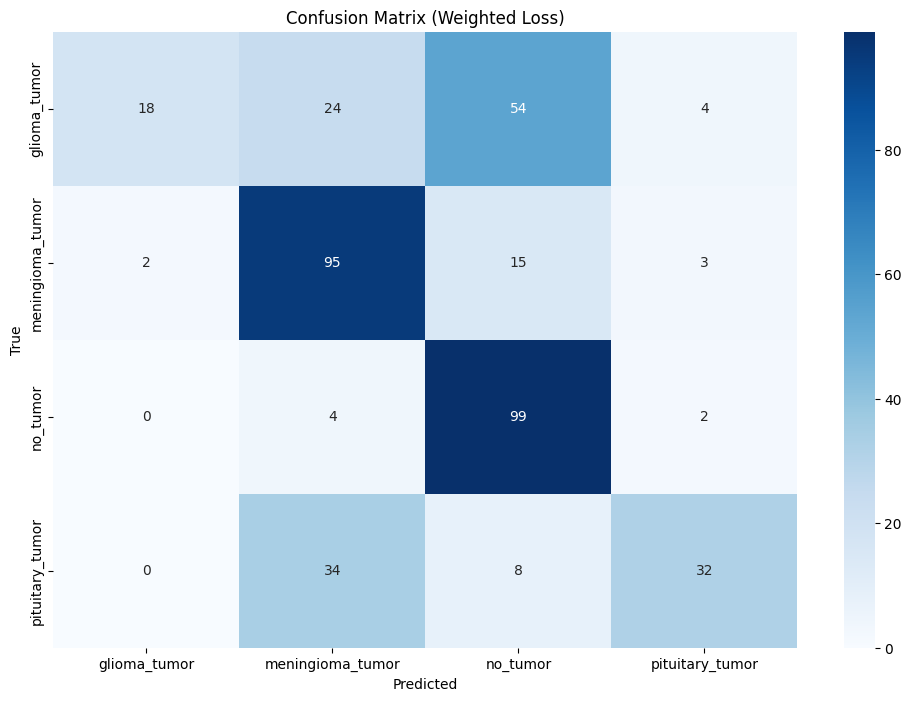

In [73]:
print("Functia de pierdere cu ponderi")
from collections import Counter

train_labels = [training_dataset_processed.labels[idx] for idx in train_indices]
class_distribution = Counter(train_labels)

# calc ponderi pt fiecare clasa
# tre sa fac label-urile sa fie numerice in loc de numele claselor oopsie
unique_labels = list(class_distribution.keys())
total_samples = sum(class_distribution.values())
class_weights = {label: total_samples / (len(class_distribution) * count) for label, count in class_distribution.items()}
weights = torch.tensor([class_weights[unique_labels[label]] for label in range(len(unique_labels))], dtype=torch.float32).to(device)

print("Ponderile pentru funcția de pierdere:")
for label, weight in class_weights.items():
    print(f"Clasa {label}: {weight:.4f}")

# loss function ponderată
loss_function = nn.CrossEntropyLoss(weight=weights)

params_train_weighted = {
    "train": train_loader,
    "val": val_loader,
    "epochs": 10,
    "optimiser": optim.Adam(model.parameters(), lr=0.001),
    "lr_change": ReduceLROnPlateau(
        optim.Adam(model.parameters(), lr=0.001),
        mode='min',
        factor=0.5,
        patience=2,
        verbose=1
    ),
    "f_loss": loss_function,  # Funcția de pierdere ponderată
    "weight_path": "best_model_weighted.pth",
}

# antrenarea modelului
print("\nAntrenarea modelului cu funcția de pierdere ponderată...")
trained_model_weighted, train_loss_history, train_metric_history = Train_Val(model, params_train_weighted, verbose=True)

# evaluarea performanței pe setul de testare
trained_model_weighted.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels_ in test_loader:
        images = images.to(device)
        labels_ = torch.tensor([labels.index(label) for label in labels_]).to(device)
        outputs = trained_model_weighted(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels_.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# calc metrica de performanta
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report (Weighted Loss):")
print(classification_report(y_true, y_pred, target_names=labels))

# matricea de confuzie
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Weighted Loss)")
plt.show()



Oversampling cu augumentari

Antrenarea modelului cu oversampling și augmentări...
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6839, Train Accuracy: 0.7370
Val Loss: 0.5053, Val Accuracy: 0.8103
------------------------------
Epoch 2/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.5371, Train Accuracy: 0.7887
Val Loss: 0.3842, Val Accuracy: 0.8678
------------------------------
Epoch 3/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.4758, Train Accuracy: 0.8145
Val Loss: 0.3411, Val Accuracy: 0.8736
------------------------------
Epoch 4/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.4306, Train Accuracy: 0.8279
Val Loss: 0.3123, Val Accuracy: 0.8851
------------------------------
Epoch 5/10, current lr=1.000000e-03
Train Loss: 0.3926, Train Accuracy: 0.8465
Val Loss: 0.3307, Val Accuracy: 0.8582
------------------------------
Epoch 6/10, current lr=1.000000e-03
Train Loss: 0.3555, Train Ac

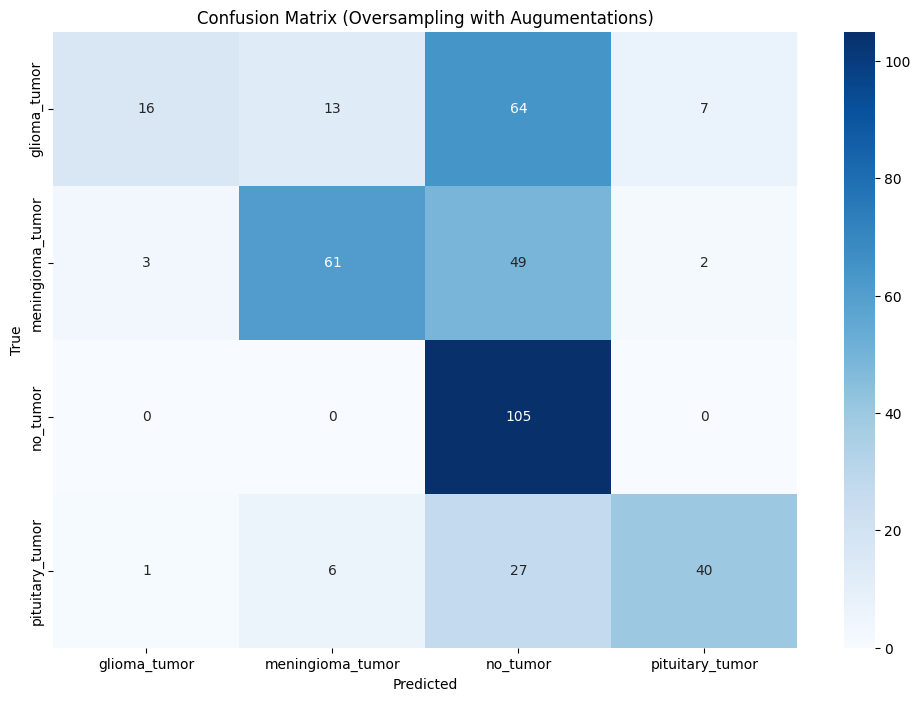

In [74]:
from torchvision import transforms

print("Oversampling cu augumentari")

augmentation_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.RandomResizedCrop(size=(60, 60), scale=(0.8, 1.0)),
])

# Creare dataset augmentat aka adaugare imagini
class AugmentedDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform
        self.oversampled_data = []
        self.oversample()

    def oversample(self):
        class_counts = Counter(self.dataset.labels)
        max_count = max(class_counts.values())
        for label in set(self.dataset.labels):
            indices = [i for i, l in enumerate(self.dataset.labels) if l == label]
            self.oversampled_data.extend(indices)
            while len(indices) < max_count:
                indices.append(indices[np.random.randint(len(indices))])
            self.oversampled_data.extend(indices)

    def __len__(self):
        return len(self.oversampled_data)

    def __getitem__(self, idx):
        index = self.oversampled_data[idx]
        image, label = self.dataset[index]
        if self.transform:
            image = self.transform(image)
        return image, label

augmented_dataset = AugmentedDataset(training_dataset_processed, transform=augmentation_transforms)
augmented_loader = DataLoader(augmented_dataset, batch_size=batch_size, shuffle=True)

params_train_augmented = {
    "train": augmented_loader,
    "val": val_loader,
    "epochs": 10,
    "optimiser": optim.Adam(model.parameters(), lr=0.001),
    "lr_change": ReduceLROnPlateau(
        optim.Adam(model.parameters(), lr=0.001),
        mode='min',
        factor=0.5,
        patience=2,
        verbose=1
    ),
    "f_loss": nn.CrossEntropyLoss(),
    "weight_path": "best_model_augmented.pth",
}

# antrenare model
print("\nAntrenarea modelului cu oversampling și augmentări...")
trained_model_augmented, train_loss_history, train_metric_history = Train_Val(model, params_train_augmented, verbose=True)

# evaluarea performanței pe setul de testare
trained_model_augmented.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels_ in test_loader:
        images = images.to(device)
        labels_ = torch.tensor([labels.index(label) for label in labels_]).to(device)
        outputs = trained_model_augmented(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels_.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# calc metrice de performanță
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report (Oversampling with Augumentations):")
print(classification_report(y_true, y_pred, target_names=labels))

# matricea de confuzie
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Oversampling with Augumentations)")
plt.show()


Oversampling fara augumentari

Antrenarea modelului cu oversampling fără augmentări...
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.1146, Train Accuracy: 0.9588
Val Loss: 0.0574, Val Accuracy: 0.9847
------------------------------
Epoch 2/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.0414, Train Accuracy: 0.9892
Val Loss: 0.0198, Val Accuracy: 0.9962
------------------------------
Epoch 3/10, current lr=1.000000e-03
Train Loss: 0.0296, Train Accuracy: 0.9928
Val Loss: 0.0496, Val Accuracy: 0.9828
------------------------------
Epoch 4/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.0185, Train Accuracy: 0.9956
Val Loss: 0.0040, Val Accuracy: 1.0000
------------------------------
Epoch 5/10, current lr=1.000000e-03
Train Loss: 0.0021, Train Accuracy: 1.0000
Val Loss: 0.0016, Val Accuracy: 1.0000
------------------------------
Epoch 6/10, current lr=1.000000e-03
Train Loss: 0.0012, Train Accuracy: 1.0000
Val Loss

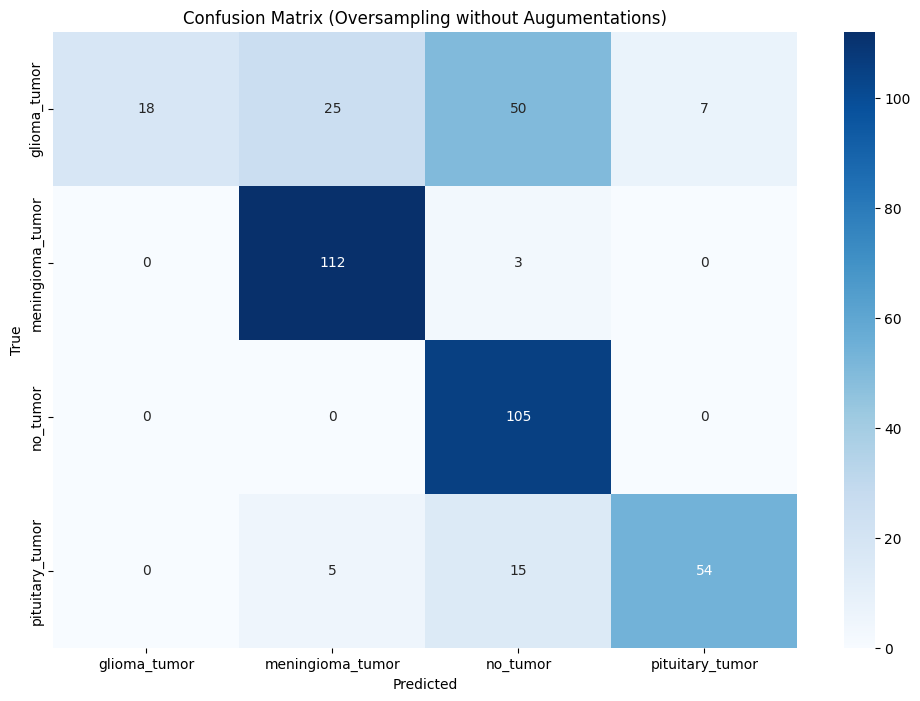

In [75]:
print("Oversampling fara augumentari")
class OversampledDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset
        self.oversampled_data = []
        self.oversample()

    def oversample(self):
        class_counts = Counter(self.dataset.labels)
        max_count = max(class_counts.values())
        for label in set(self.dataset.labels):
            indices = [i for i, l in enumerate(self.dataset.labels) if l == label]
            self.oversampled_data.extend(indices)
            while len(indices) < max_count:
                indices.append(indices[np.random.randint(len(indices))])
            self.oversampled_data.extend(indices)

    def __len__(self):
        return len(self.oversampled_data)

    def __getitem__(self, idx):
        index = self.oversampled_data[idx]
        return self.dataset[index]

oversampled_dataset = OversampledDataset(training_dataset_processed)
oversampled_loader = DataLoader(oversampled_dataset, batch_size=batch_size, shuffle=True)

params_train_oversampled = {
    "train": oversampled_loader,
    "val": val_loader,
    "epochs": 10,
    "optimiser": optim.Adam(model.parameters(), lr=0.001),
    "lr_change": ReduceLROnPlateau(
        optim.Adam(model.parameters(), lr=0.001),
        mode='min',
        factor=0.5,
        patience=2,
        verbose=1
    ),
    "f_loss": nn.CrossEntropyLoss(),  # Funcția de pierdere standard
    "weight_path": "best_model_oversampled.pth",
}

# antrenare model
print("\nAntrenarea modelului cu oversampling fără augmentări...")
trained_model_oversampled, train_loss_history, train_metric_history = Train_Val(model, params_train_oversampled, verbose=True)

# evaluarea performanta pe setul de testare
trained_model_oversampled.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels_ in test_loader:
        images = images.to(device)
        labels_ = torch.tensor([labels.index(label) for label in labels_]).to(device)
        outputs = trained_model_oversampled(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels_.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# calc matrice de performanta
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report (Oversampling without Augumentations):")
print(classification_report(y_true, y_pred, target_names=labels))

# matricea de confuzie
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Oversampling without Augumentations)")
plt.show()


# 2.3 Cerinta 3

Explorati impactul augmentarilor asupra performantei modelului utilizand biblioteca
MONAI. Implementati si testati diferite seturi de transformari pentru datele de intrare, avand ca obiectiv cresterea performantei modelului. Sarcina presupune:
1. Definirea augmentarilor: Pornind de la transformatele analizate etapa trecuta, definiti cel putin trei seturi diferite de transformari. Puteti utiliza transformari
din monai.transforms.
2. Antrenarea si evaluarea: Pentru fiecare set de transformari:
 1.  Antrenati modelul utilizand fold-urile definite anterior (k-fold validation).
 2. Salvati si afisati metricile de performanta pentru fiecare fold, inclusiv:
    - Evolutia functiei (loss) pe train si validation
    - Acuratetea (accuracy) pe train si validation.
    - Valorile medii pentru metricile Precision, Recal F1-Score si AUC pentru setul de testare.
3. Realizati un tabel comparativ al performantelor pentru cele trei seturi de augmentari. Indicati in concluzie care set a adus cele mai bune imbunatatiri si justificati raspunsul.

In [76]:
!pip install monai


Evaluare pentru setul de augmentări 1
Fold 1/5
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 1.1353, Train Accuracy: 0.5077
Val Loss: 0.9857, Val Accuracy: 0.6341
------------------------------
Epoch 2/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.9360, Train Accuracy: 0.6226
Val Loss: 0.8051, Val Accuracy: 0.6801
------------------------------
Epoch 3/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.8197, Train Accuracy: 0.6643
Val Loss: 0.7331, Val Accuracy: 0.7222
------------------------------
Epoch 4/10, current lr=1.000000e-03
Train Loss: 0.7753, Train Accuracy: 0.6844
Val Loss: 0.8580, Val Accuracy: 0.6916
------------------------------
Epoch 5/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.7272, Train Accuracy: 0.7050
Val Loss: 0.6521, Val Accuracy: 0.7567
------------------------------
Epoch 6/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6729, Train Accuracy: 

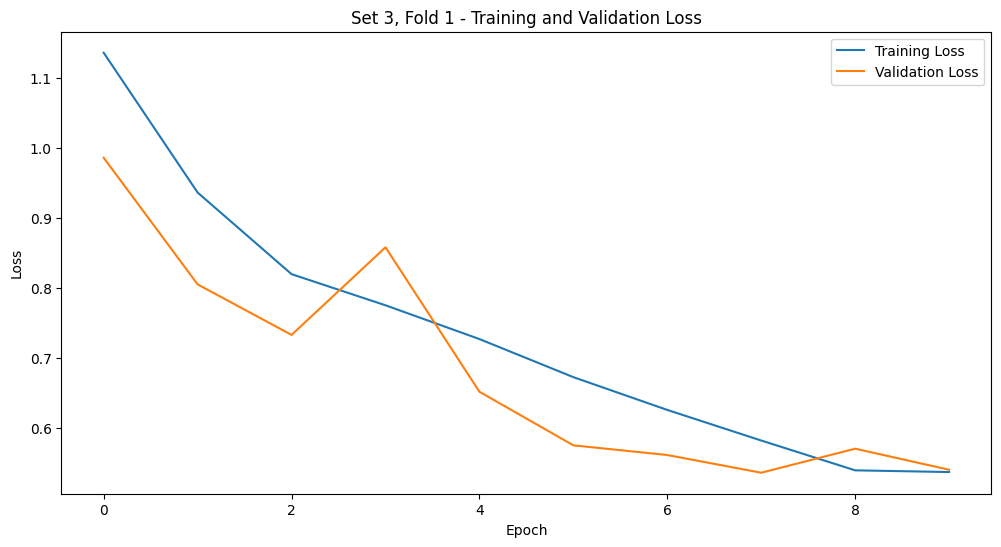

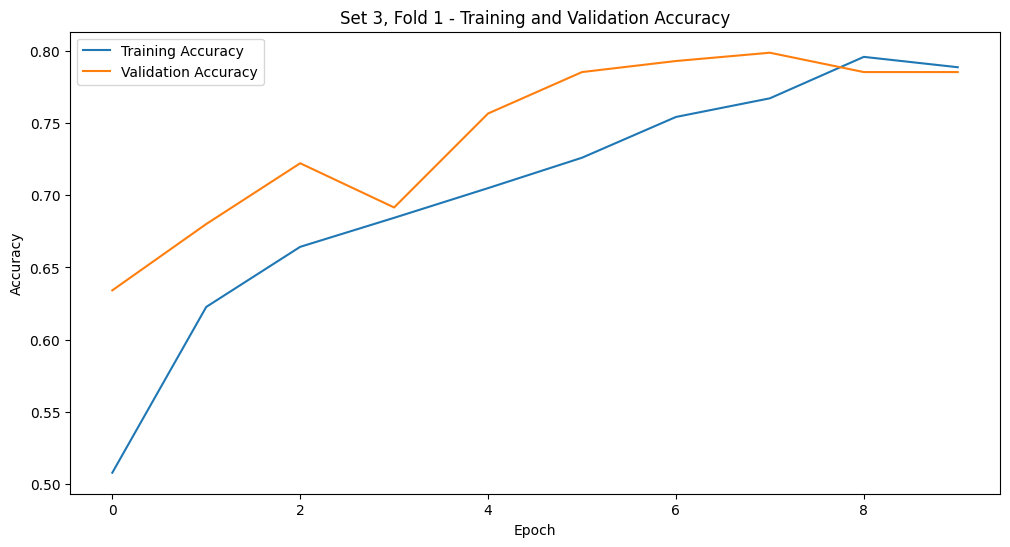

Fold 2/5
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 1.1574, Train Accuracy: 0.4631
Val Loss: 0.9305, Val Accuracy: 0.6437
------------------------------
Epoch 2/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.9041, Train Accuracy: 0.6370
Val Loss: 0.8402, Val Accuracy: 0.6839
------------------------------
Epoch 3/10, current lr=1.000000e-03
Train Loss: 0.8219, Train Accuracy: 0.6681
Val Loss: 1.0774, Val Accuracy: 0.5900
------------------------------
Epoch 4/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.7806, Train Accuracy: 0.6887
Val Loss: 0.7380, Val Accuracy: 0.6877
------------------------------
Epoch 5/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.7402, Train Accuracy: 0.7059
Val Loss: 0.6918, Val Accuracy: 0.7107
------------------------------
Epoch 6/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6878, Train Accuracy: 0.7222
Val Loss: 0.6106, Val Accuracy: 

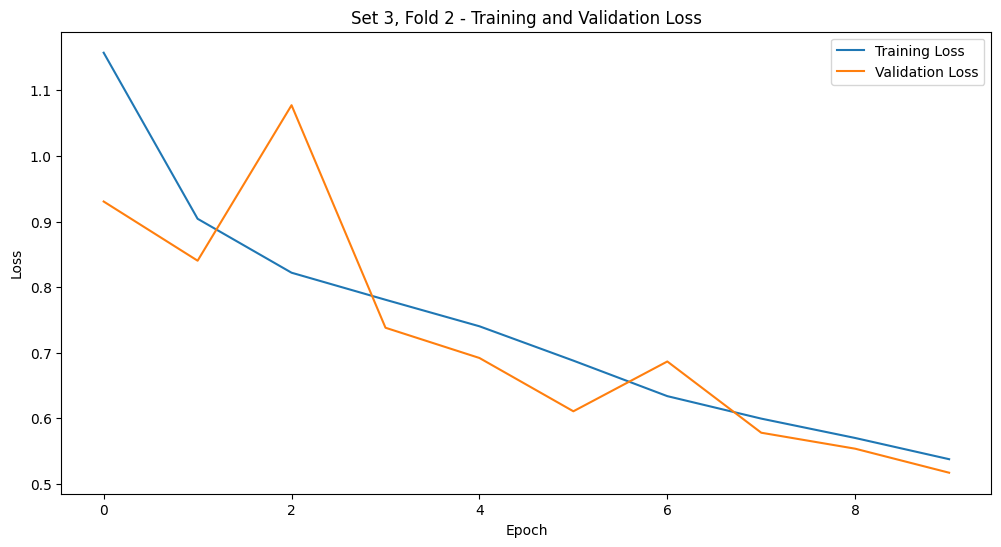

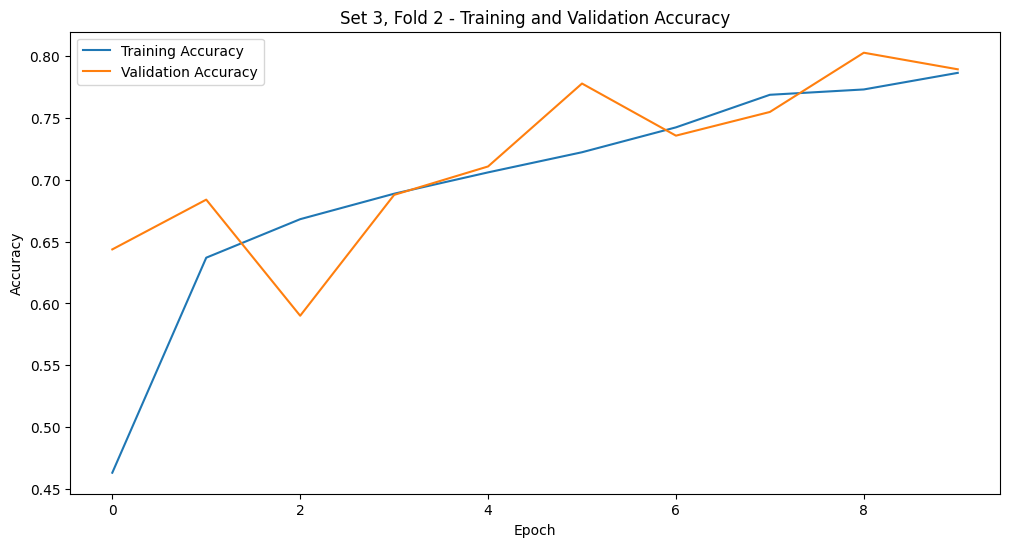

Fold 3/5
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 1.1256, Train Accuracy: 0.5144
Val Loss: 0.9201, Val Accuracy: 0.6322
------------------------------
Epoch 2/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.9003, Train Accuracy: 0.6422
Val Loss: 0.7572, Val Accuracy: 0.7088
------------------------------
Epoch 3/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.8010, Train Accuracy: 0.6796
Val Loss: 0.7218, Val Accuracy: 0.7126
------------------------------
Epoch 4/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6887, Train Accuracy: 0.7299
Val Loss: 0.6717, Val Accuracy: 0.7146
------------------------------
Epoch 5/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6510, Train Accuracy: 0.7390
Val Loss: 0.6040, Val Accuracy: 0.7490
------------------------------
Epoch 6/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.5860, Train Accuracy: 0.7754
Val L

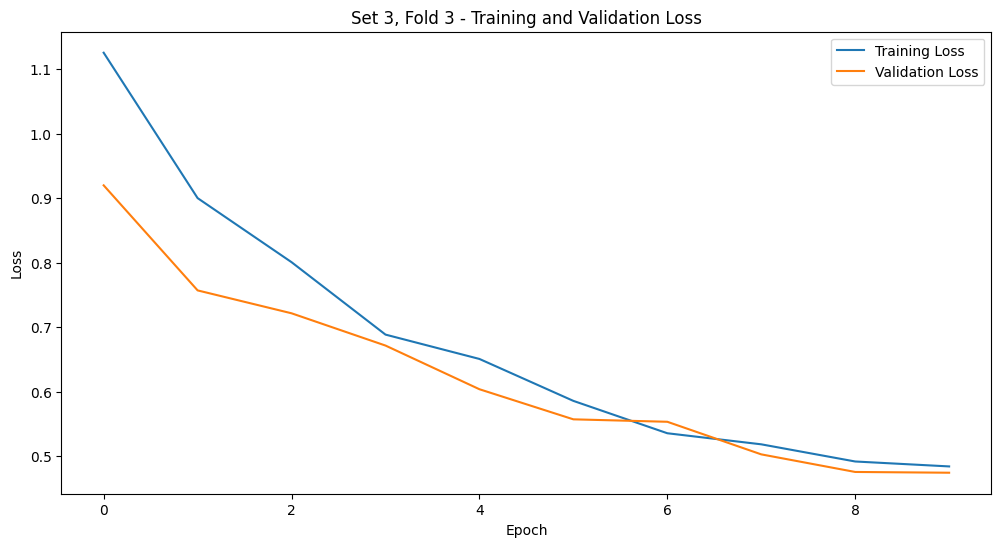

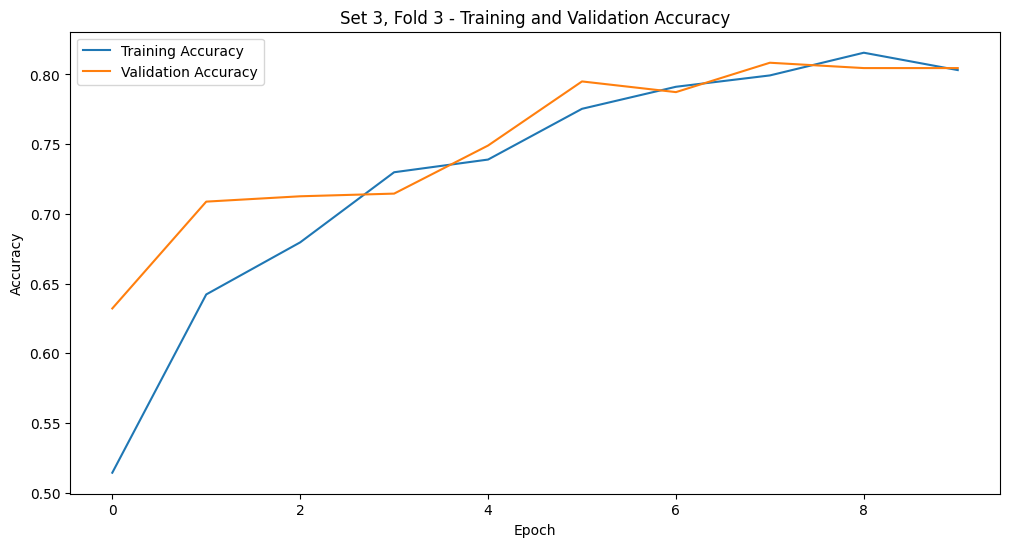

Fold 4/5
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 1.1172, Train Accuracy: 0.5115
Val Loss: 0.9006, Val Accuracy: 0.6552
------------------------------
Epoch 2/10, current lr=1.000000e-03
Train Loss: 0.8953, Train Accuracy: 0.6451
Val Loss: 0.8933, Val Accuracy: 0.6130
------------------------------
Epoch 3/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.8276, Train Accuracy: 0.6715
Val Loss: 0.7124, Val Accuracy: 0.7088
------------------------------
Epoch 4/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.7395, Train Accuracy: 0.7112
Val Loss: 0.6735, Val Accuracy: 0.7241
------------------------------
Epoch 5/10, current lr=1.000000e-03
Train Loss: 0.6960, Train Accuracy: 0.7284
Val Loss: 0.7454, Val Accuracy: 0.7088
------------------------------
Epoch 6/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6485, Train Accuracy: 0.7486
Val Loss: 0.5988, Val Accuracy: 0.7318
--------------------

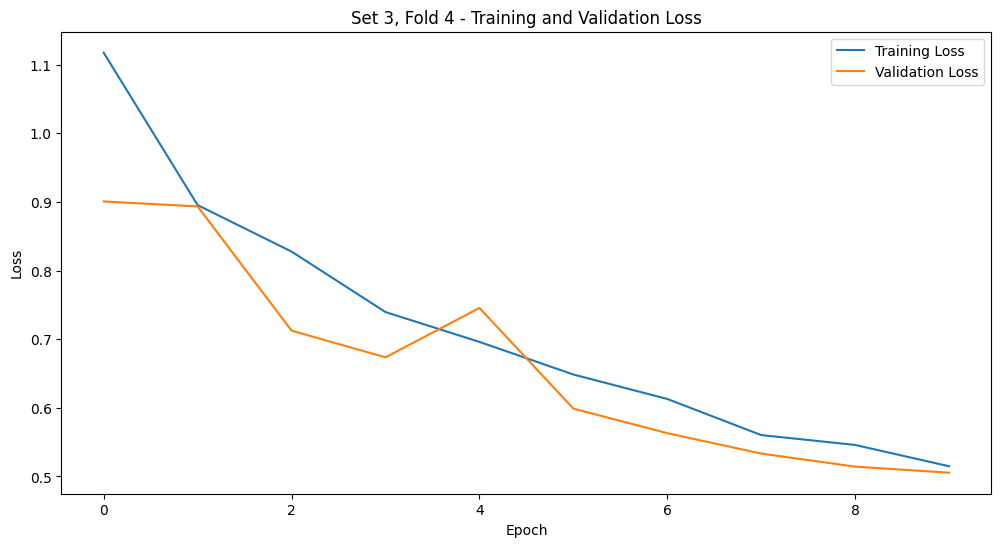

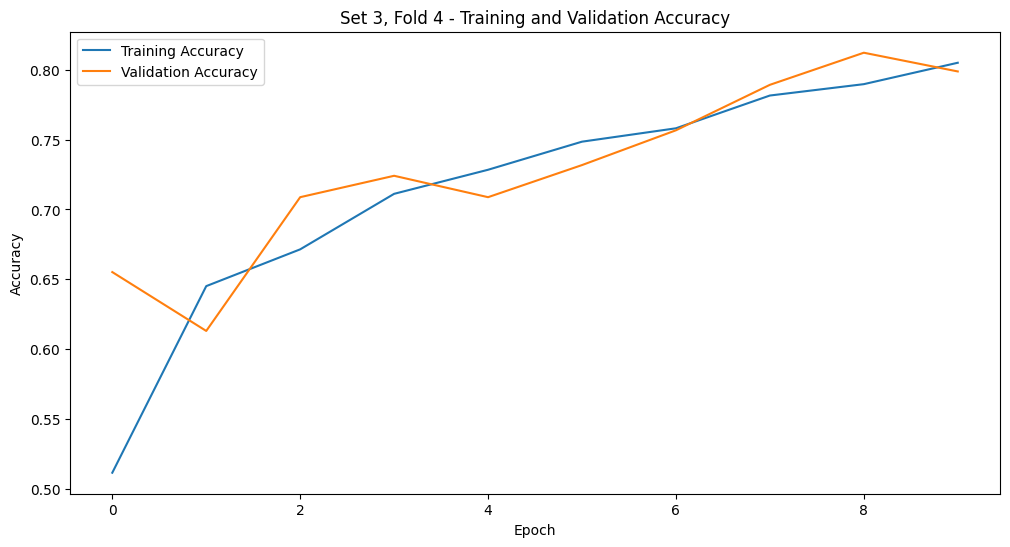

Fold 5/5
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 1.1600, Train Accuracy: 0.4919
Val Loss: 0.9492, Val Accuracy: 0.6303
------------------------------
Epoch 2/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.9034, Train Accuracy: 0.6446
Val Loss: 0.8130, Val Accuracy: 0.6877
------------------------------
Epoch 3/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.8171, Train Accuracy: 0.6753
Val Loss: 0.7322, Val Accuracy: 0.7299
------------------------------
Epoch 4/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.7327, Train Accuracy: 0.7074
Val Loss: 0.6640, Val Accuracy: 0.7395
------------------------------
Epoch 5/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6638, Train Accuracy: 0.7419
Val Loss: 0.6631, Val Accuracy: 0.7452
------------------------------
Epoch 6/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6167, Train Accuracy: 0.7625
Val L

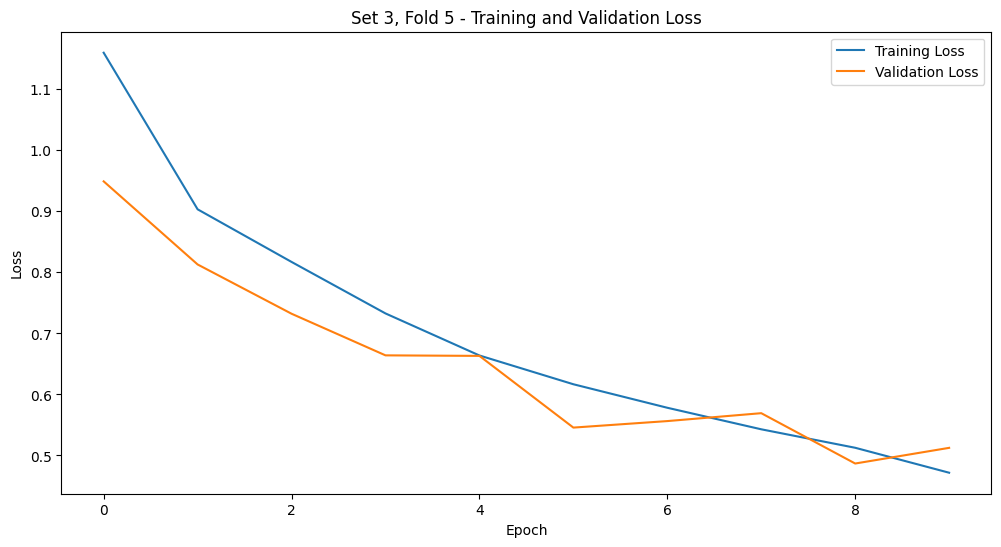

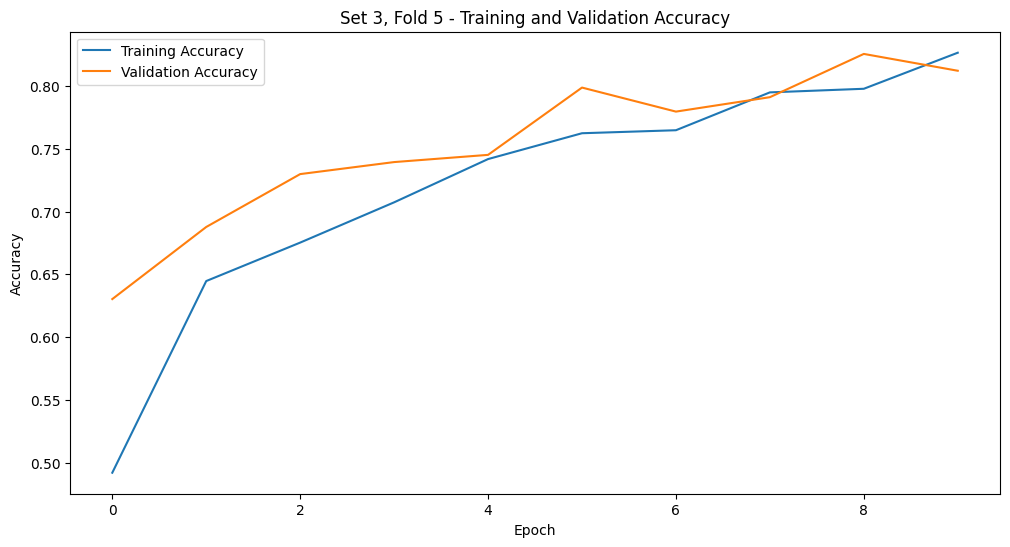

Rezultate pentru setul de augmentări 1: {'precision': (0.5495760278698308, 0.037405053402348766), 'recall': (0.4294416243654823, 0.03251902005694815), 'f1_score': (0.3823222741003377, 0.037045654935508106), 'accuracy': (0.4294416243654823, 0.03251902005694815)}

Evaluare pentru setul de augmentări 2
Fold 1/5
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 1.0906, Train Accuracy: 0.5268
Val Loss: 0.8893, Val Accuracy: 0.6475
------------------------------
Epoch 2/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.8594, Train Accuracy: 0.6533
Val Loss: 0.7336, Val Accuracy: 0.6916
------------------------------
Epoch 3/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.7181, Train Accuracy: 0.7098
Val Loss: 0.6294, Val Accuracy: 0.7625
------------------------------
Epoch 4/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6645, Train Accuracy: 0.7270
Val Loss: 0.6346, Val Accuracy: 0.7682
-----------------

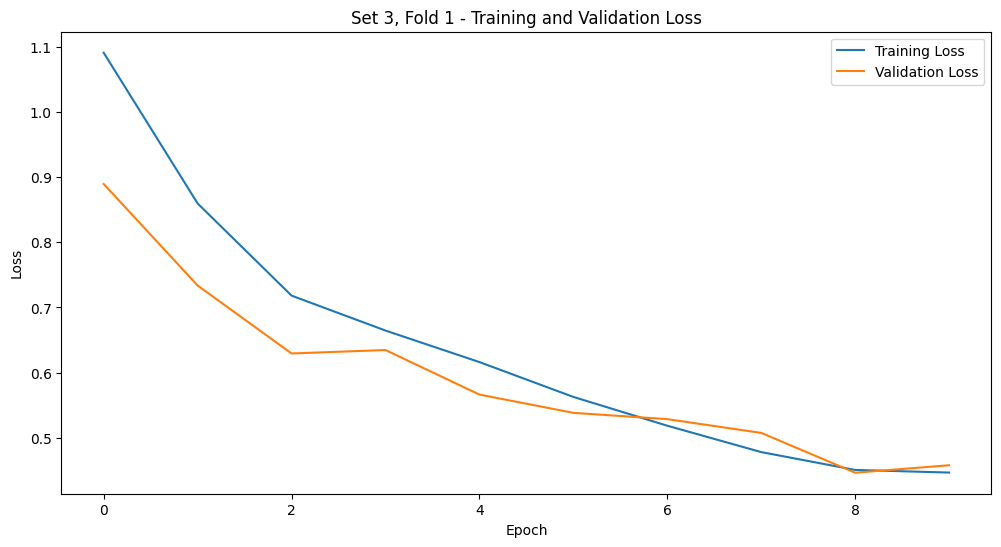

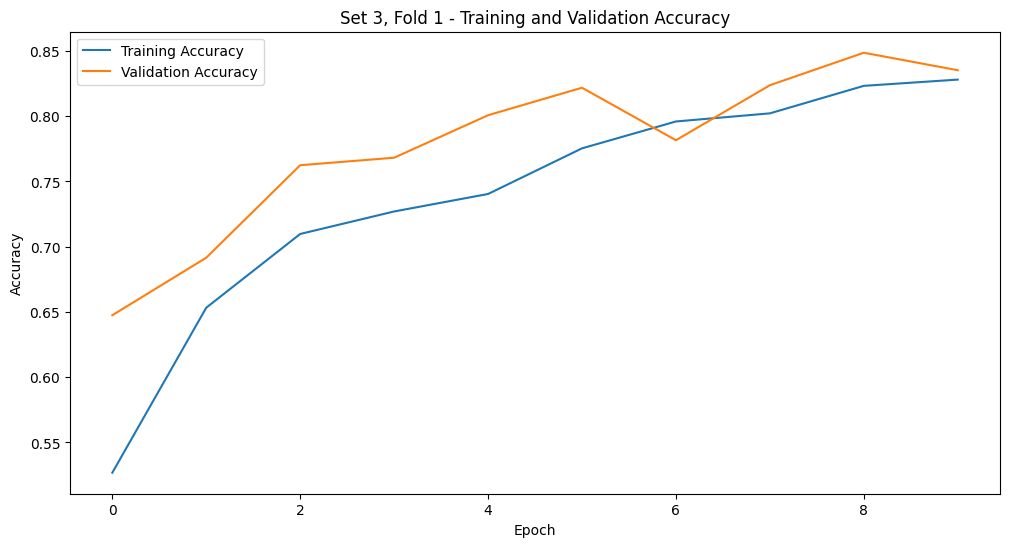

Fold 2/5
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 1.0859, Train Accuracy: 0.5383
Val Loss: 0.7937, Val Accuracy: 0.6437
------------------------------
Epoch 2/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.7699, Train Accuracy: 0.6858
Val Loss: 0.6473, Val Accuracy: 0.7567
------------------------------
Epoch 3/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6612, Train Accuracy: 0.7304
Val Loss: 0.5932, Val Accuracy: 0.7854
------------------------------
Epoch 4/10, current lr=1.000000e-03
Train Loss: 0.6398, Train Accuracy: 0.7390
Val Loss: 0.5606, Val Accuracy: 0.7759
------------------------------
Epoch 5/10, current lr=1.000000e-03
Train Loss: 0.5593, Train Accuracy: 0.7687
Val Loss: 0.5360, Val Accuracy: 0.7854
------------------------------
Epoch 6/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.5199, Train Accuracy: 0.7883
Val Loss: 0.4955, Val Accuracy: 0.8142
--------------------

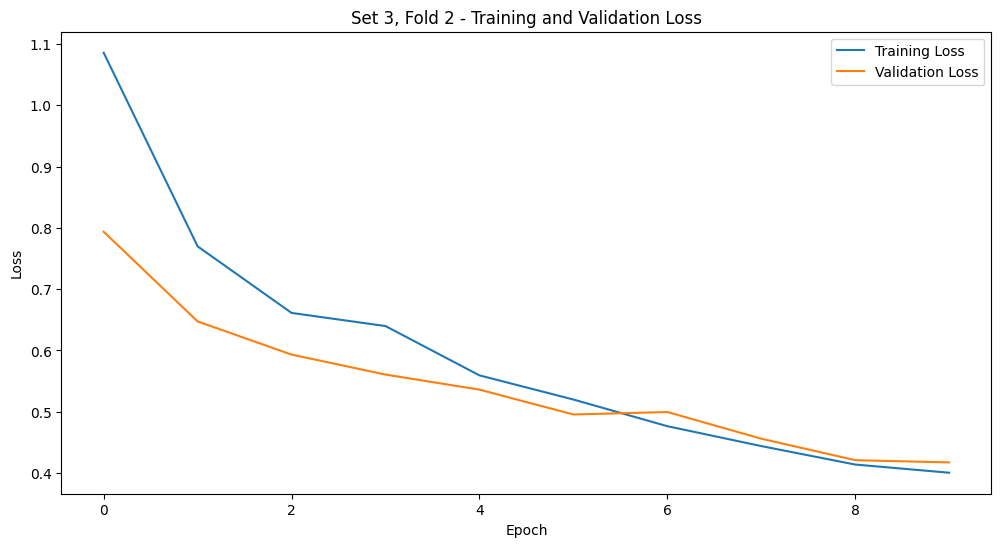

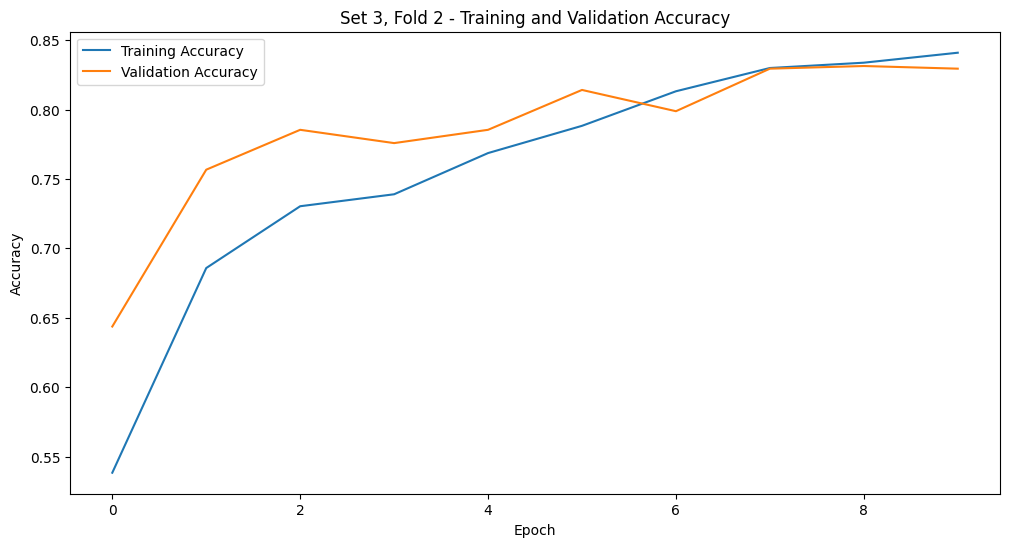

Fold 3/5
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 1.1032, Train Accuracy: 0.5125
Val Loss: 0.9213, Val Accuracy: 0.6169
------------------------------
Epoch 2/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.8463, Train Accuracy: 0.6537
Val Loss: 0.7577, Val Accuracy: 0.7184
------------------------------
Epoch 3/10, current lr=1.000000e-03
Train Loss: 0.7538, Train Accuracy: 0.7083
Val Loss: 0.7147, Val Accuracy: 0.7184
------------------------------
Epoch 4/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6868, Train Accuracy: 0.7270
Val Loss: 0.5988, Val Accuracy: 0.7586
------------------------------
Epoch 5/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6082, Train Accuracy: 0.7629
Val Loss: 0.6439, Val Accuracy: 0.7644
------------------------------
Epoch 6/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.5972, Train Accuracy: 0.7581
Val Loss: 0.5641, Val Accuracy: 

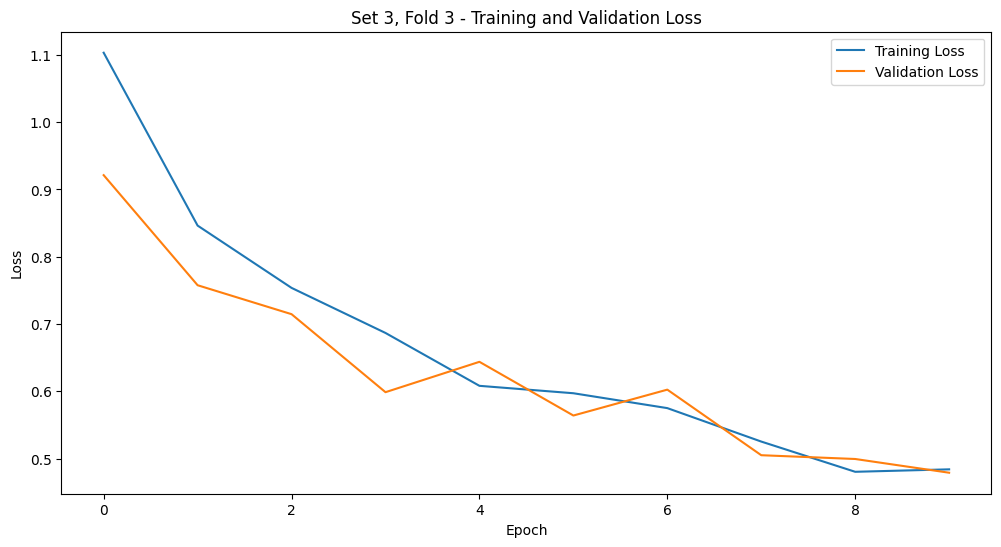

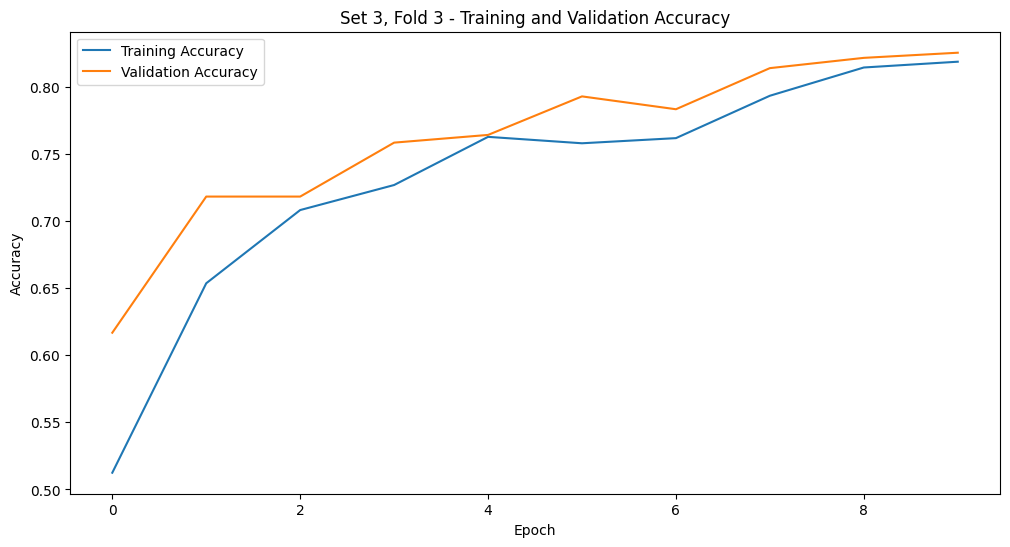

Fold 4/5
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 1.0977, Train Accuracy: 0.5120
Val Loss: 0.8883, Val Accuracy: 0.6303
------------------------------
Epoch 2/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.8005, Train Accuracy: 0.6901
Val Loss: 0.7199, Val Accuracy: 0.7241
------------------------------
Epoch 3/10, current lr=1.000000e-03
Train Loss: 0.7138, Train Accuracy: 0.7107
Val Loss: 0.6642, Val Accuracy: 0.6897
------------------------------
Epoch 4/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6376, Train Accuracy: 0.7505
Val Loss: 0.6874, Val Accuracy: 0.7605
------------------------------
Epoch 5/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.5971, Train Accuracy: 0.7692
Val Loss: 0.5613, Val Accuracy: 0.7854
------------------------------
Epoch 6/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.5588, Train Accuracy: 0.7787
Val Loss: 0.5221, Val Accuracy: 

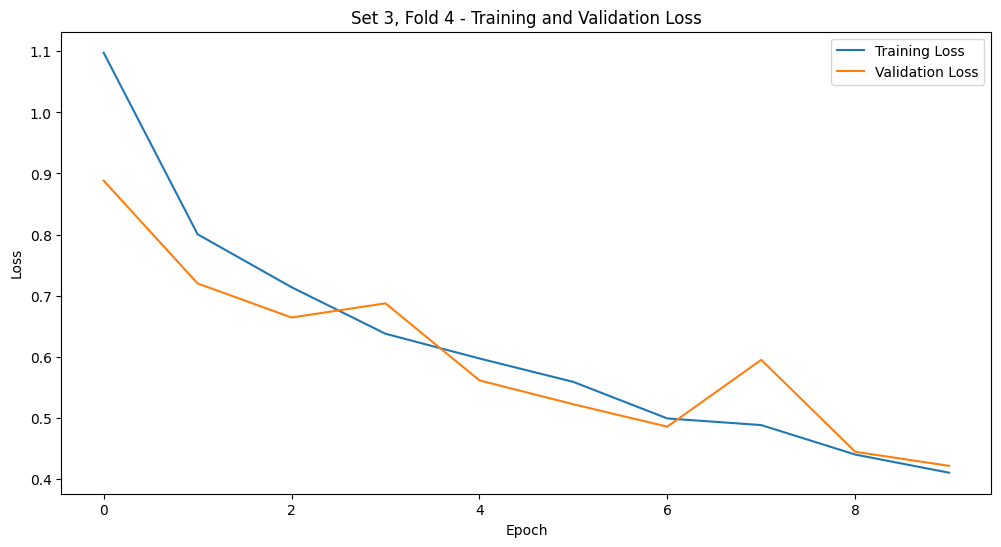

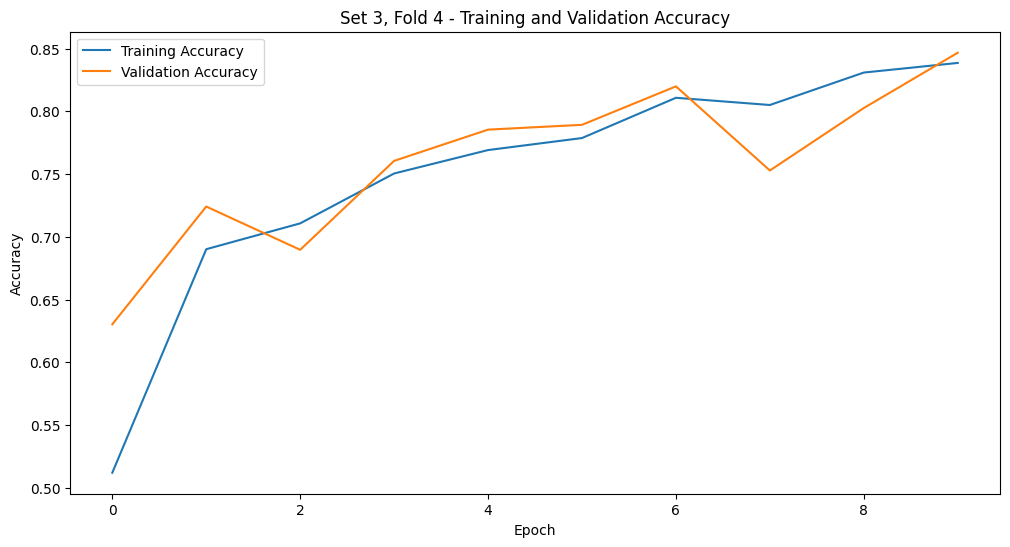

Fold 5/5
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 1.1447, Train Accuracy: 0.4799
Val Loss: 0.9953, Val Accuracy: 0.6073
------------------------------
Epoch 2/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.8858, Train Accuracy: 0.6466
Val Loss: 0.8629, Val Accuracy: 0.6590
------------------------------
Epoch 3/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.7604, Train Accuracy: 0.7007
Val Loss: 0.7350, Val Accuracy: 0.7107
------------------------------
Epoch 4/10, current lr=1.000000e-03
Train Loss: 0.6781, Train Accuracy: 0.7275
Val Loss: 0.7839, Val Accuracy: 0.6935
------------------------------
Epoch 5/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6465, Train Accuracy: 0.7462
Val Loss: 0.6286, Val Accuracy: 0.7720
------------------------------
Epoch 6/10, current lr=1.000000e-03
Train Loss: 0.6017, Train Accuracy: 0.7534
Val Loss: 0.6148, Val Accuracy: 0.7720
--------------------

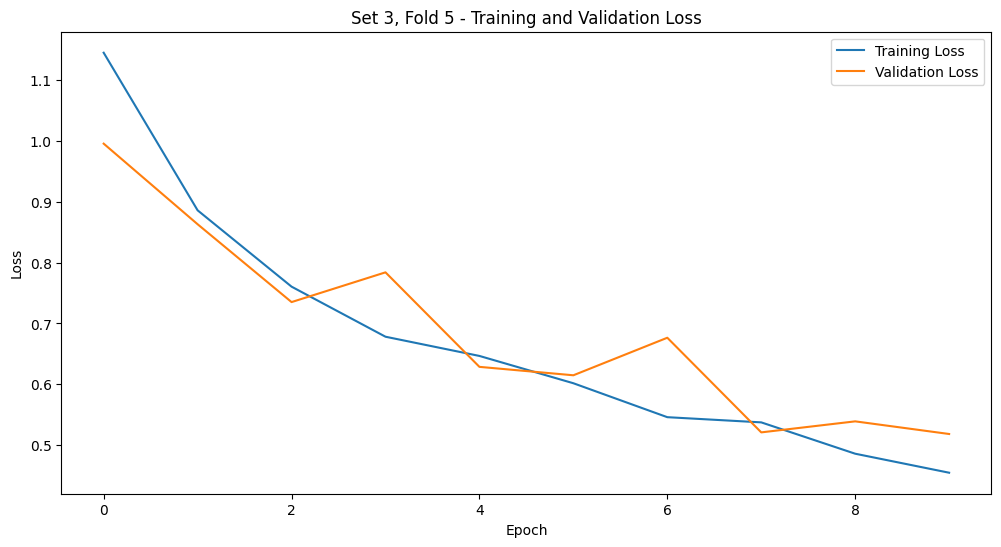

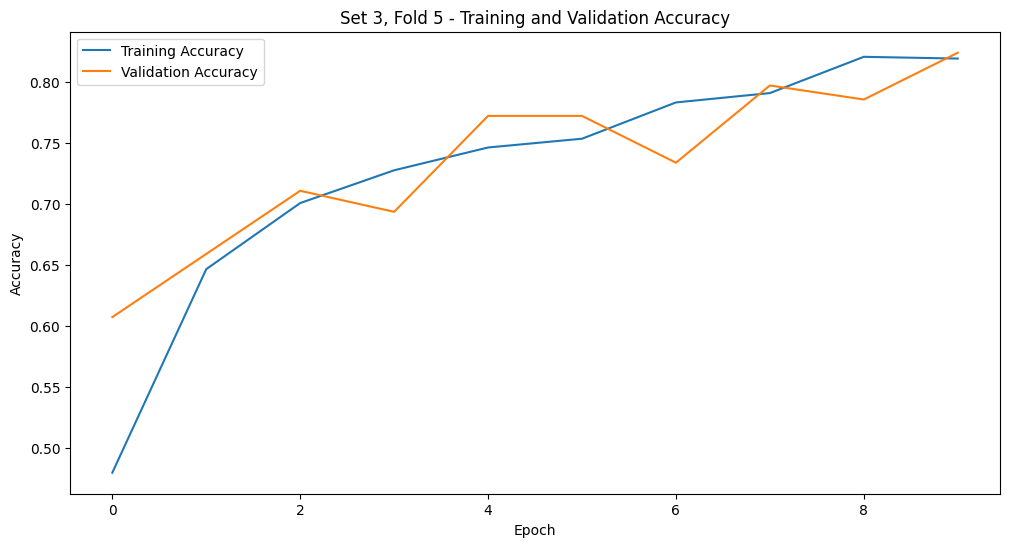

Rezultate pentru setul de augmentări 2: {'precision': (0.5883695027626714, 0.018973319513834054), 'recall': (0.48223350253807107, 0.049968425187105425), 'f1_score': (0.4418569573219931, 0.05184122828676386), 'accuracy': (0.48223350253807107, 0.049968425187105425)}

Evaluare pentru setul de augmentări 3
Fold 1/5
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 1.2254, Train Accuracy: 0.4593
Val Loss: 0.9906, Val Accuracy: 0.6609
------------------------------
Epoch 2/10, current lr=1.000000e-03
Train Loss: 0.9757, Train Accuracy: 0.5943
Val Loss: 0.8421, Val Accuracy: 0.6590
------------------------------
Epoch 3/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.8495, Train Accuracy: 0.6528
Val Loss: 0.7234, Val Accuracy: 0.7452
------------------------------
Epoch 4/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.7790, Train Accuracy: 0.6815
Val Loss: 0.6058, Val Accuracy: 0.7720
------------------------------
Epoch 5/10

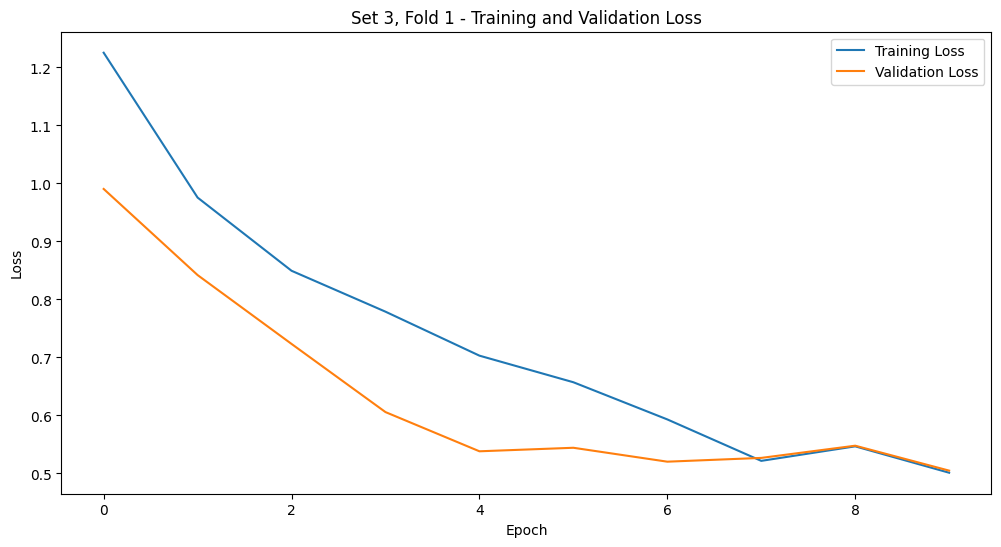

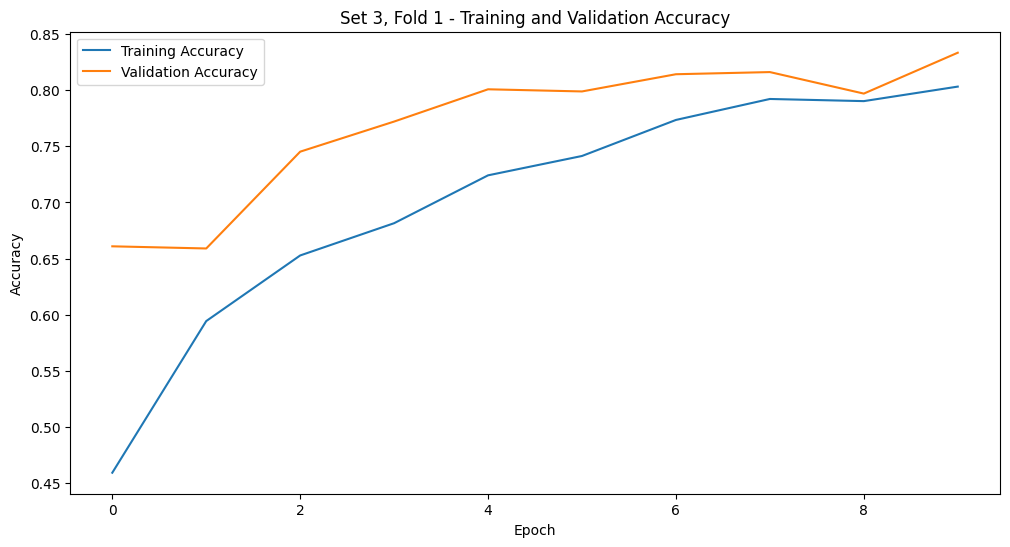

Fold 2/5
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 1.1695, Train Accuracy: 0.4828
Val Loss: 0.9000, Val Accuracy: 0.5996
------------------------------
Epoch 2/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.9007, Train Accuracy: 0.6384
Val Loss: 0.7125, Val Accuracy: 0.7146
------------------------------
Epoch 3/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.7946, Train Accuracy: 0.6762
Val Loss: 0.6312, Val Accuracy: 0.7759
------------------------------
Epoch 4/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6985, Train Accuracy: 0.7289
Val Loss: 0.5755, Val Accuracy: 0.7912
------------------------------
Epoch 5/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6530, Train Accuracy: 0.7375
Val Loss: 0.5551, Val Accuracy: 0.8084
------------------------------
Epoch 6/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6251, Train Accuracy: 0.7457
Val L

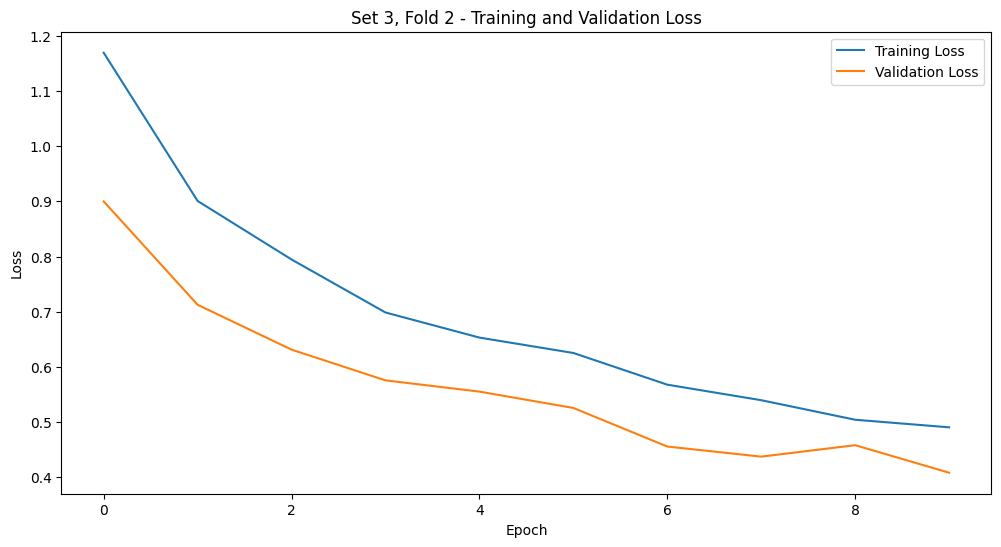

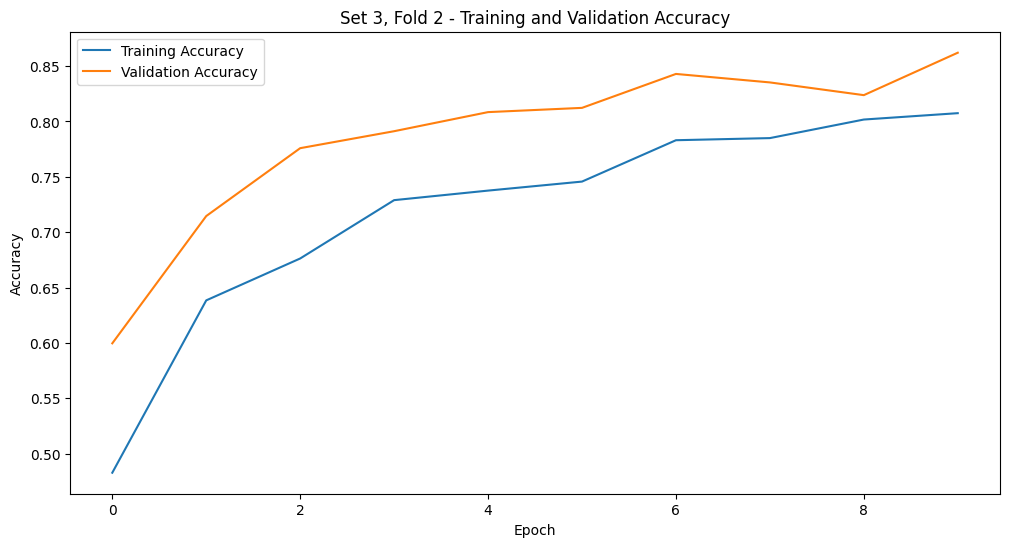

Fold 3/5
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 1.2327, Train Accuracy: 0.4234
Val Loss: 0.9455, Val Accuracy: 0.6609
------------------------------
Epoch 2/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.9562, Train Accuracy: 0.6049
Val Loss: 0.7554, Val Accuracy: 0.7088
------------------------------
Epoch 3/10, current lr=1.000000e-03
Train Loss: 0.8355, Train Accuracy: 0.6624
Val Loss: 0.7885, Val Accuracy: 0.6667
------------------------------
Epoch 4/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.7394, Train Accuracy: 0.7011
Val Loss: 0.6943, Val Accuracy: 0.7567
------------------------------
Epoch 5/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6953, Train Accuracy: 0.7203
Val Loss: 0.6206, Val Accuracy: 0.7682
------------------------------
Epoch 6/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6194, Train Accuracy: 0.7620
Val Loss: 0.5428, Val Accuracy: 

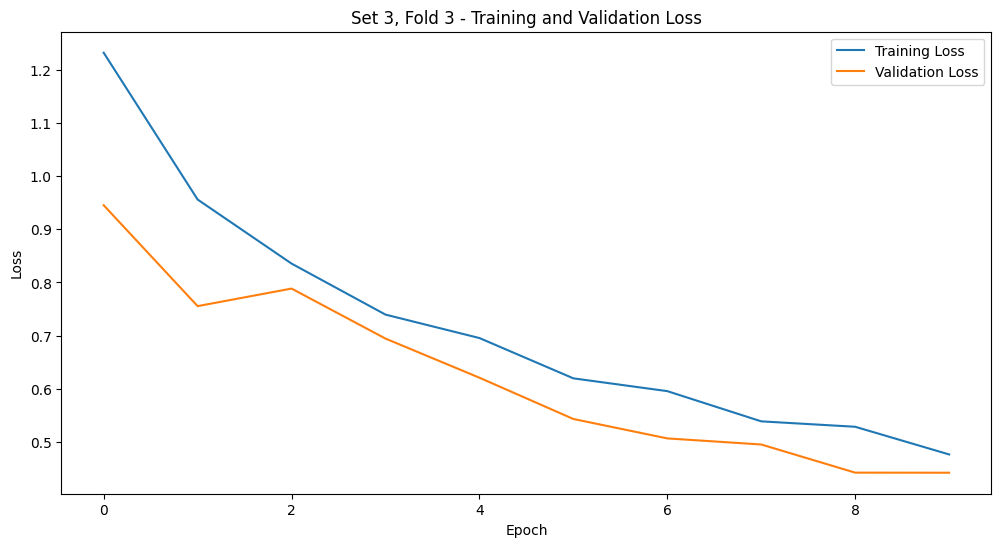

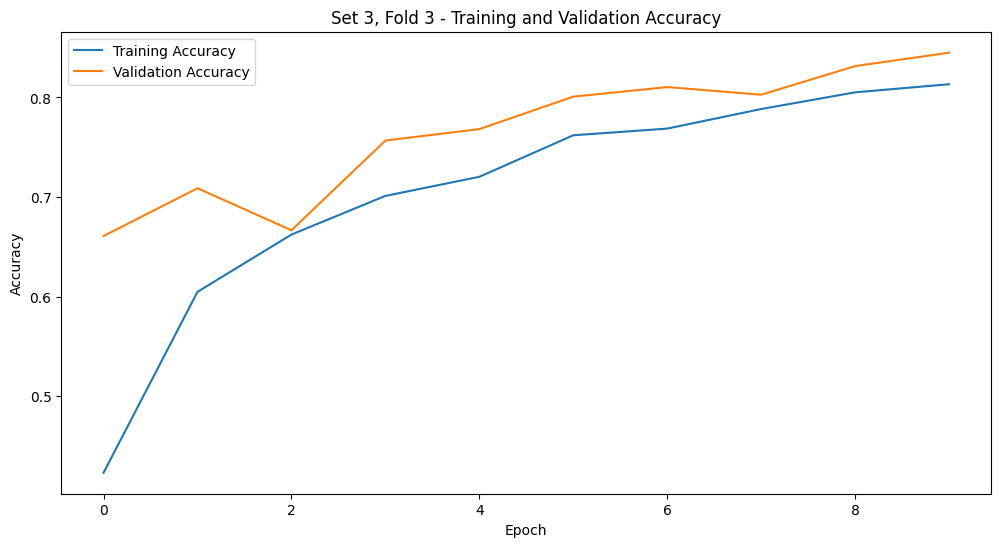

Fold 4/5
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 1.1717, Train Accuracy: 0.4880
Val Loss: 0.9613, Val Accuracy: 0.5690
------------------------------
Epoch 2/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.9179, Train Accuracy: 0.6446
Val Loss: 0.7327, Val Accuracy: 0.7126
------------------------------
Epoch 3/10, current lr=1.000000e-03
Train Loss: 0.7961, Train Accuracy: 0.6839
Val Loss: 0.7891, Val Accuracy: 0.6916
------------------------------
Epoch 4/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.7150, Train Accuracy: 0.7184
Val Loss: 0.5728, Val Accuracy: 0.7816
------------------------------
Epoch 5/10, current lr=1.000000e-03
Train Loss: 0.6412, Train Accuracy: 0.7581
Val Loss: 0.6687, Val Accuracy: 0.7241
------------------------------
Epoch 6/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6014, Train Accuracy: 0.7663
Val Loss: 0.5230, Val Accuracy: 0.7874
--------------------

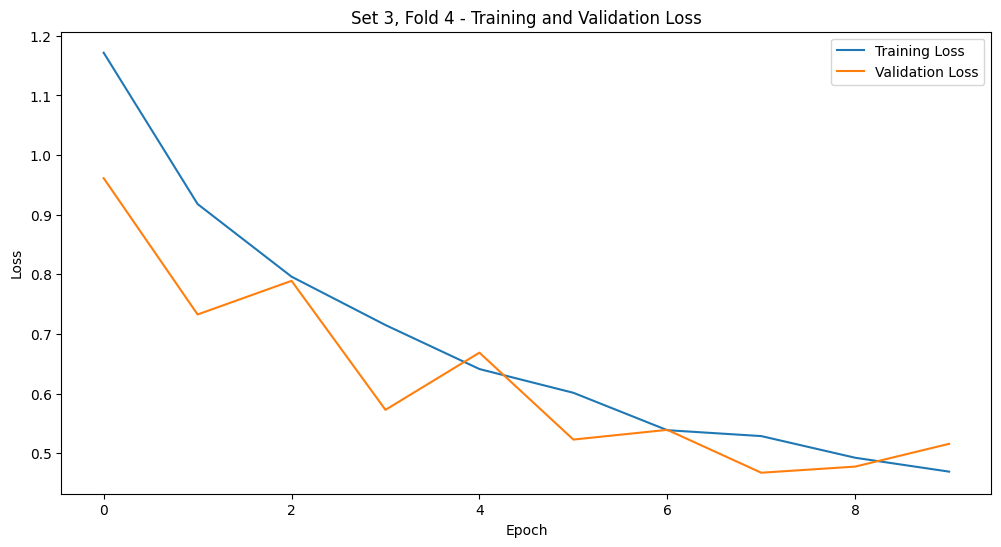

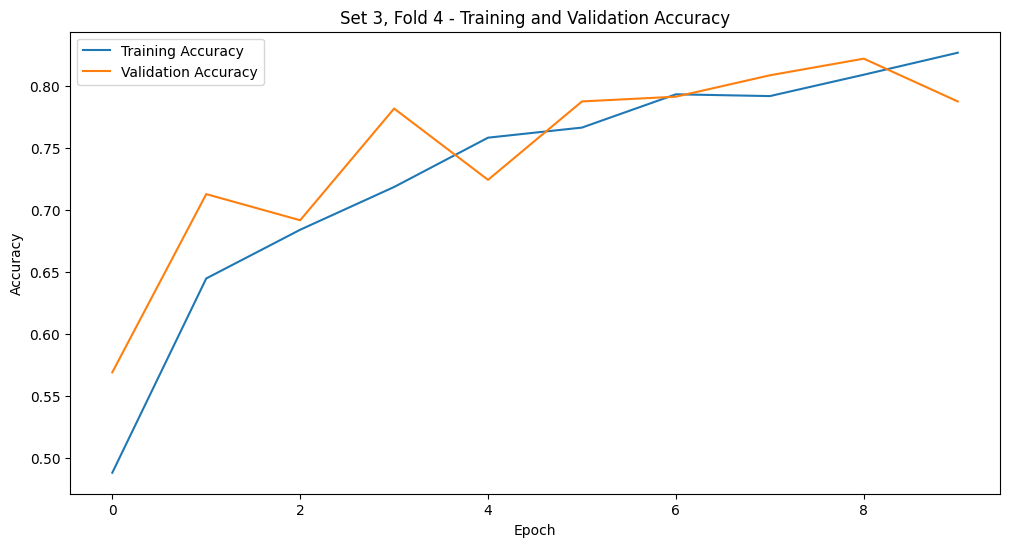

Fold 5/5
Epoch 1/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 1.0998, Train Accuracy: 0.5263
Val Loss: 0.9251, Val Accuracy: 0.6513
------------------------------
Epoch 2/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.8595, Train Accuracy: 0.6451
Val Loss: 0.7223, Val Accuracy: 0.7241
------------------------------
Epoch 3/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.7527, Train Accuracy: 0.6973
Val Loss: 0.6788, Val Accuracy: 0.7395
------------------------------
Epoch 4/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6992, Train Accuracy: 0.7189
Val Loss: 0.6504, Val Accuracy: 0.7452
------------------------------
Epoch 5/10, current lr=1.000000e-03
Copied best model weights!
Train Loss: 0.6295, Train Accuracy: 0.7553
Val Loss: 0.5514, Val Accuracy: 0.7950
------------------------------
Epoch 6/10, current lr=1.000000e-03
Train Loss: 0.5660, Train Accuracy: 0.7787
Val Loss: 0.5425, Val Accuracy: 

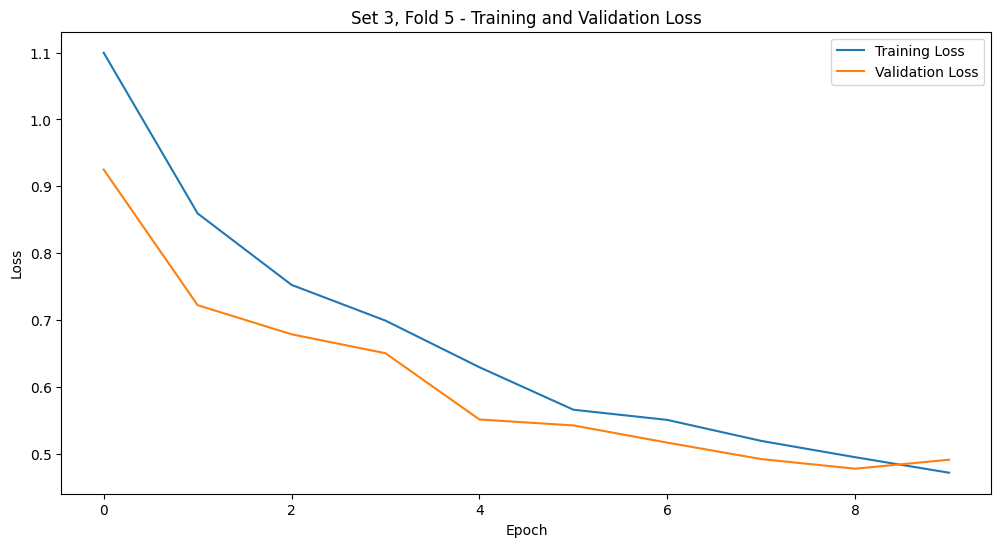

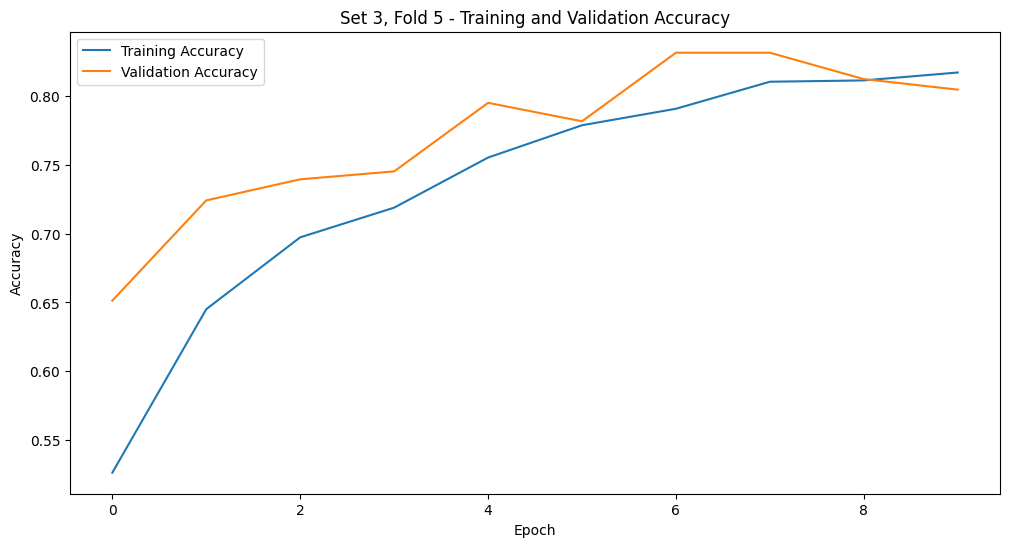

Rezultate pentru setul de augmentări 3: {'precision': (0.6591754349569641, 0.03138846955237063), 'recall': (0.5568527918781726, 0.014231315501397149), 'f1_score': (0.5159341324746166, 0.011991847487046091), 'accuracy': (0.5568527918781726, 0.014231315501397149)}

Rezultate comparate pentru seturile de augmentări:
                     Set 1            Set 2            Set 3
precision  0.5496 ± 0.0374  0.5884 ± 0.0190  0.6592 ± 0.0314
recall     0.4294 ± 0.0325  0.4822 ± 0.0500  0.5569 ± 0.0142
f1_score   0.3823 ± 0.0370  0.4419 ± 0.0518  0.5159 ± 0.0120
accuracy   0.4294 ± 0.0325  0.4822 ± 0.0500  0.5569 ± 0.0142


In [80]:

import torch
import numpy as np
from collections import Counter
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from monai.transforms import Compose, RandRotate, RandFlip, RandZoom, RandGaussianNoise
from sklearn.model_selection import StratifiedKFold

# Definirea seturilor de augmentări
augmentation_sets = [
    Compose([
        RandFlip(spatial_axis=0, prob=0.5),
        RandRotate(range_x=np.pi / 12, prob=0.5),
        RandZoom(min_zoom=0.9, max_zoom=1.1, prob=0.5)
    ]),
    Compose([
        RandGaussianNoise(prob=0.5),
        RandFlip(spatial_axis=1, prob=0.5),
        RandRotate(range_x=np.pi / 6, prob=0.5)
    ]),
    Compose([
        RandZoom(min_zoom=0.8, max_zoom=1.2, prob=0.5),
        RandRotate(range_x=np.pi / 18, prob=0.5),
        RandGaussianNoise(prob=0.5)
    ])
]

# Funcție pentru crearea unui dataset augmentat
class AugmentedDatasetMonai(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Antrenare și evaluare pentru fiecare set de augmentări
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Obțineți indicii pentru imaginile de antrenare și etichete
train_image_paths, train_labels, val_image_paths, val_labels = split_data_by_class(training_dataset_processed)
image_path_to_index = {path: i for i, path in enumerate(training_dataset_processed.image_paths)}
data_indices = [image_path_to_index[path] for path in train_image_paths]
data_labels = train_labels

# Rezultate pentru fiecare set de augmentări
augmentation_results = []

for aug_idx, transform in enumerate(augmentation_sets):
      print(f"\nEvaluare pentru setul de augmentări {aug_idx + 1}")
      fold_metrics = {
          "precision": [],
          "recall": [],
          "f1_score": [],
          "accuracy": []
      }

      for fold, (train_idx, val_idx) in enumerate(skf.split(data_indices, data_labels)):
          print(f"Fold {fold + 1}/{k}")

          # Creare Subset și DataLoader pentru antrenare și validare
          train_subset = Subset(training_dataset_processed, [data_indices[i] for i in train_idx])
          val_subset = Subset(training_dataset_processed, [data_indices[i] for i in val_idx])

          augmented_train_dataset = AugmentedDatasetMonai(train_subset, transform=transform)
          train_loader = DataLoader(augmented_train_dataset, batch_size=batch_size, shuffle=True)
          val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

          # Antrenare model
          model = SimpleCNN(num_classes=len(labels)).to(device)
          params_train = {
              "train": train_loader,
              "val": val_loader,
              "epochs": 10,
              "optimiser": torch.optim.Adam(model.parameters(), lr=0.001),
              "lr_change": torch.optim.lr_scheduler.ReduceLROnPlateau(
                  torch.optim.Adam(model.parameters(), lr=0.001),
                  mode='min',
                  factor=0.5,
                  patience=2,
                  verbose=1
              ),
              "f_loss": torch.nn.CrossEntropyLoss(),
              "weight_path": f"best_model_aug_set_{aug_idx + 1}_fold_{fold + 1}.pth",
          }

          trained_model, train_loss_history, train_metric_history = Train_Val(model, params_train, verbose=True)

          # Evaluare pe setul de testare
          trained_model.eval()
          y_true, y_pred = [], []

          with torch.no_grad():
              for images, labels_ in test_loader:
                  images = images.to(device)
                  labels_ = torch.tensor([labels.index(label) for label in labels_]).to(device)
                  outputs = trained_model(images)
                  _, predicted = torch.max(outputs.data, 1)
                  y_true.extend(labels_.cpu().numpy())
                  y_pred.extend(predicted.cpu().numpy())

          # Calcularea metricei de performanță
          precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
          accuracy = accuracy_score(y_true, y_pred)

          fold_metrics["precision"].append(precision)
          fold_metrics["recall"].append(recall)
          fold_metrics["f1_score"].append(f1)
          fold_metrics["accuracy"].append(accuracy)

          # Generare grafice pentru loss și acuratețe
          plt.figure(figsize=(12, 6))
          plt.plot(train_loss_history["train"], label='Training Loss')
          plt.plot(train_loss_history["val"], label='Validation Loss')
          plt.xlabel('Epoch')
          plt.ylabel('Loss')
          plt.legend()
          plt.title(f'Set {2 + 1}, Fold {fold + 1} - Training and Validation Loss')
          plt.show()

          plt.figure(figsize=(12, 6))
          plt.plot(train_metric_history["train"], label='Training Accuracy')
          plt.plot(train_metric_history["val"], label='Validation Accuracy')
          plt.xlabel('Epoch')
          plt.ylabel('Accuracy')
          plt.legend()
          plt.title(f'Set {2 + 1}, Fold {fold + 1} - Training and Validation Accuracy')
          plt.show()

      # Calculare medii și deviații standard pentru metrici
      metrics_summary = {
          metric: (np.mean(values), np.std(values)) for metric, values in fold_metrics.items()
      }
      augmentation_results.append(metrics_summary)
      print(f"Rezultate pentru setul de augmentări {aug_idx + 1}: {metrics_summary}")

# metric_summary_1 = {'precision': (0.8052126320688897, 0.013267538670031083), 'recall': (0.8022988505747126, 0.014253697500182587), 'f1_score': (0.7995885799620788, 0.013328886021091817), 'accuracy': (0.8022988505747126, 0.014253697500182587)}
# augmentation_results.append(metric_summary_1)
# metric_summary_2 = {'precision': (0.8238448641970482, 0.007478772669420029), 'recall': (0.8195402298850574, 0.009798246630302251), 'f1_score': (0.8165850604607231, 0.009544332699714645), 'accuracy': (0.8195402298850574, 0.009798246630302251)}
# augmentation_results.append(metric_summary_2)
# metric_summary_3 = {'precision': (0.840143822262821, 0.018857341639205064), 'recall': (0.8375478927203066, 0.016936426134329764), 'f1_score': (0.8348609244787367, 0.01998136381258651), 'accuracy': (0.8375478927203066, 0.016936426134329764)}
# augmentation_results.append(metric_summary_3)
# Comparare rezultate pentru fiecare set de augmentări
import pandas as pd

results_df = pd.DataFrame({
    f"Set {i + 1}": {
        metric: f"{mean:.4f} ± {std:.4f}" for metric, (mean, std) in results.items()
    } for i, results in enumerate(augmentation_results)
})

print("\nRezultate comparate pentru seturile de augmentări:")
print(results_df)


# 2.4 Cerinta 4

Pentru a imbunatati performanta modelului si a preveni overfitting-ul implementati si testati urmatoarele tehnici:
1. Early Stopping: Implementati mecanismul de early stopping pentru a opri antrenarea modelului atunci cand performanta pe setul de validare nu mai este imbunatatita de-a lungul unui anumit numar de epoci (pana la 3 epoci consecutive, de exemplu).
Aceasta ajuta la prevenirea overfitting-ului si la economisirea de resurse.

2. LR Scheduler: Adaugati un learning rate scheduler pentru a ajusta rata de
invatare pe parcursul procesului de antrenare. Exemple de schedulere de rata de
ınvatare ce pot fi utilizate includ:
 - StepLR – scade rata de ınvat,are cu un factor la fiecare numar fix de epoci.
 - ReduceLROnPlateau – scade rata de ınvatare cand performanta pe setul de
validare nu se ımbunatateste.

Pentru fiecare tehnica:
1. Antrenati modelul utilizand fold-ul pentru care ati obtinut cele mai proaste performante pe setul de validare.
2. Afisati si analizati performanta modelului pentru fiecare metoda implementata, inclusiv pierderea si acuratetea pe seturile de train si validation.
3. Comparati rezultatele obtinute pentru fiecare tehnica si justificati utilizarea lor in contextul problemei.
4. Masurati timpul necesar procesului de antrenare si raportati-l in tabelul cu rezultatele metricilor de evaluare.



Training with Early Stopping:
Validation loss improved. Saving model...
Epoch 1/20, Train Loss: 1.0221, Val Loss: 0.8136, Train Acc: 0.5795, Val Acc: 0.6839
Validation loss improved. Saving model...
Epoch 2/20, Train Loss: 0.7092, Val Loss: 0.6820, Train Acc: 0.7122, Val Acc: 0.7280
Validation loss improved. Saving model...
Epoch 3/20, Train Loss: 0.5694, Val Loss: 0.5621, Train Acc: 0.7787, Val Acc: 0.8046
Validation loss improved. Saving model...
Epoch 4/20, Train Loss: 0.4590, Val Loss: 0.5368, Train Acc: 0.8290, Val Acc: 0.8199
Validation loss improved. Saving model...
Epoch 5/20, Train Loss: 0.4015, Val Loss: 0.4565, Train Acc: 0.8439, Val Acc: 0.8487
Validation loss improved. Saving model...
Epoch 6/20, Train Loss: 0.3299, Val Loss: 0.4358, Train Acc: 0.8726, Val Acc: 0.8506
Validation loss improved. Saving model...
Epoch 7/20, Train Loss: 0.2862, Val Loss: 0.3907, Train Acc: 0.8942, Val Acc: 0.8736
No improvement in validation loss for 1/3 epochs.
Epoch 8/20, Train Loss: 0.2283

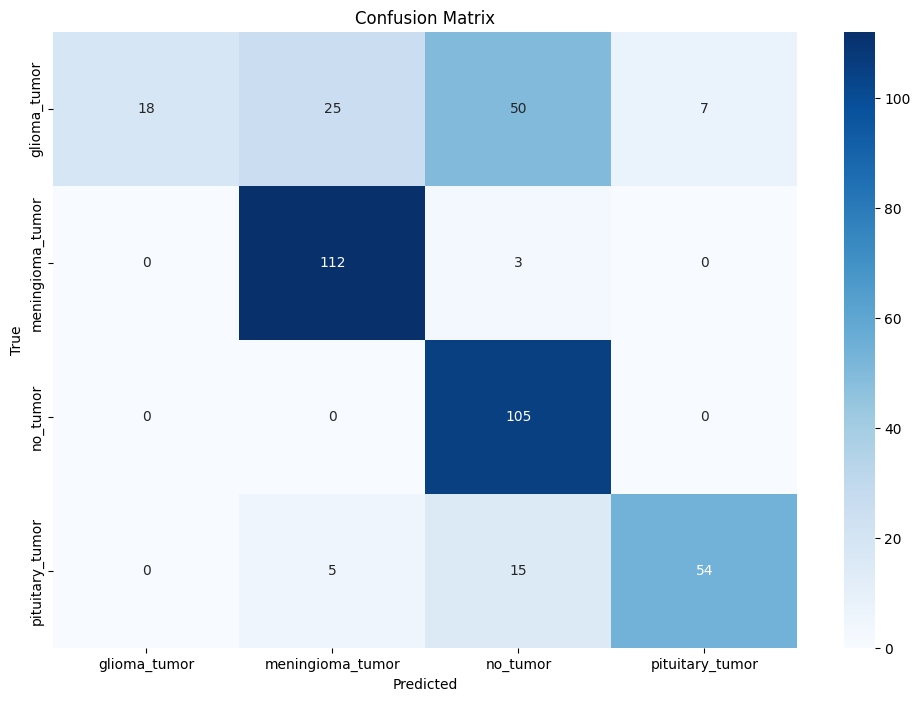

In [88]:
import torch
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau
import time

class EarlyStopping:
    def __init__(self, patience=3, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, val_loss, model, path):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
            torch.save(model.state_dict(), path)
            if self.verbose:
                print("Validation loss improved. Saving model...")
        else:
            self.counter += 1
            if self.verbose:
                print(f"No improvement in validation loss for {self.counter}/{self.patience} epochs.")
            if self.counter >= self.patience:
                self.early_stop = True

# functie train cu Early Stopping
def train_with_early_stopping(model, train_loader, val_loader, criterion, optimizer, early_stopping, epochs=20, device="cuda", weight_path="best_model_es.pth"):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels_ in train_loader:
            images = images.to(device)
            #convertirea labelurilor pt ca imi place sa mi fac viata urata si nu le am facut numerice
            labels_ = torch.tensor([labels.index(label) for label in labels_]).to(device)


            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels_)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels_.size(0)
            correct += (predicted == labels_).sum().item()

        train_loss = running_loss / len(train_loader.dataset)
        train_acc = correct / total

        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels_ in val_loader:
                images, labels_ = images.to(device), torch.tensor([labels.index(label) for label in labels_]).to(device)
                outputs = model(images)
                loss = criterion(outputs, labels_)

                val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels_.size(0)
                correct += (predicted == labels_).sum().item()

        val_loss /= len(val_loader.dataset)
        val_acc = correct / total

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        early_stopping(val_loss, model, weight_path)
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")
    end_time = time.time()
    training_time = end_time - start_time
    return train_losses, val_losses, train_accuracies, val_accuracies, training_time


# Model and criterion setup
model = SimpleCNN(num_classes=4).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Early Stopping
print("\nTraining with Early Stopping:")
early_stopping = EarlyStopping(patience=3, verbose=True)
train_losses_es, val_losses_es, train_acc_es, val_acc_es, training_time_es = train_with_early_stopping(
    model, worst_train_loader, worst_val_loader, criterion, optimizer, early_stopping=early_stopping, device=device, weight_path="best_model_es.pth"
)

# evaluarea performanta pe setul de testare
trained_model_oversampled.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels_ in test_loader:
        images = images.to(device)
        labels_ = torch.tensor([labels.index(label) for label in labels_]).to(device)
        outputs = trained_model_oversampled(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels_.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# calc matrice de performanta
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

# matricea de confuzie
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()




Training with StepLR:
Epoch 1/20, Train Loss: 2.2104, Val Loss: 1.3837, Train Acc: 0.1916, Val Acc: 0.3525
Epoch 2/20, Train Loss: 1.3953, Val Loss: 1.3861, Train Acc: 0.2433, Val Acc: 0.2433
Epoch 3/20, Train Loss: 1.3879, Val Loss: 1.3860, Train Acc: 0.2433, Val Acc: 0.2433
Epoch 4/20, Train Loss: 1.3867, Val Loss: 1.3814, Train Acc: 0.2433, Val Acc: 0.2433
Epoch 5/20, Train Loss: 1.3857, Val Loss: 1.3714, Train Acc: 0.2433, Val Acc: 0.2433
Epoch 6/20, Train Loss: 1.3838, Val Loss: 1.3663, Train Acc: 0.2433, Val Acc: 0.2433
Epoch 7/20, Train Loss: 1.3740, Val Loss: 1.3284, Train Acc: 0.2433, Val Acc: 0.2433
Epoch 8/20, Train Loss: 1.3783, Val Loss: 1.3419, Train Acc: 0.2280, Val Acc: 0.2567
Epoch 9/20, Train Loss: 1.3366, Val Loss: 1.3115, Train Acc: 0.2529, Val Acc: 0.2414
Epoch 10/20, Train Loss: 1.3888, Val Loss: 1.3211, Train Acc: 0.2644, Val Acc: 0.3870
Epoch 11/20, Train Loss: 1.3083, Val Loss: 1.2729, Train Acc: 0.3870, Val Acc: 0.2433
Epoch 12/20, Train Loss: 1.3264, Val Los

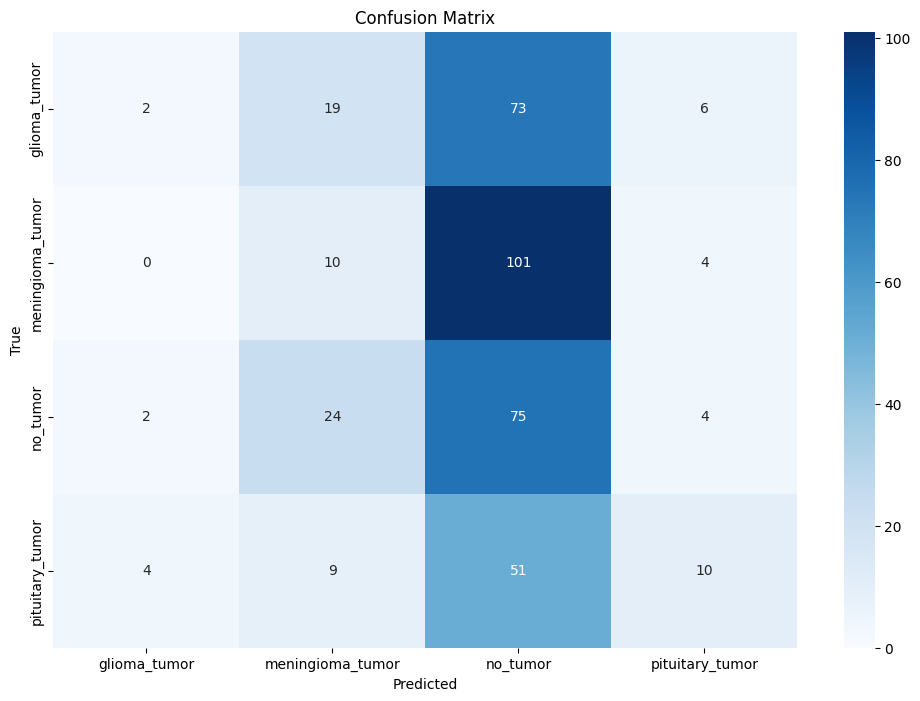

In [91]:
import torch
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau
import time

# Function for training with LR Scheduler
def train_with_lr_scheduler(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=20, device="cuda", weight_path="best_model_lr.pth"):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    best_model_wts = None
    best_val_loss = float('inf')

    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels_ in train_loader:
            images, labels_ = images.to(device), torch.tensor([labels.index(label) for label in labels_]).to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels_)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels_.size(0)
            correct += (predicted == labels_).sum().item()

        train_loss = running_loss / len(train_loader.dataset)
        train_acc = correct / total

        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels_ in val_loader:
                images, labels_ = images.to(device), torch.tensor([labels.index(label) for label in labels_]).to(device)
                outputs = model(images)
                loss = criterion(outputs, labels_)

                val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels_.size(0)
                correct += (predicted == labels_).sum().item()

        val_loss /= len(val_loader.dataset)
        val_acc = correct / total

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        scheduler.step(val_loss if isinstance(scheduler, ReduceLROnPlateau) else epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_wts = model.state_dict()

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

    end_time = time.time()
    training_time = end_time - start_time

    model.load_state_dict(best_model_wts)
    torch.save(model.state_dict(), weight_path)
    return model, train_losses, val_losses, train_accuracies, val_accuracies, training_time

# Model and criterion setup
model = SimpleCNN(num_classes=4).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# LR Scheduler (StepLR)
print("\nTraining with StepLR:")
scheduler = StepLR(optimizer, step_size=2, gamma=0.9)
trained_model, train_losses_step, val_losses_step, train_acc_step, val_acc_step, training_time = train_with_lr_scheduler(
    model, worst_val_loader, worst_val_loader, criterion, optimizer, scheduler=scheduler, device=device, weight_path="best_model_step.pth"
)

print(f"Training completed in {training_time:.2f} seconds")

# evaluarea performanta pe setul de testare
trained_model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels_ in test_loader:
        images = images.to(device)
        labels_ = torch.tensor([labels.index(label) for label in labels_]).to(device)
        outputs = trained_model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels_.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# calc matrice de performanta
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

# matricea de confuzie
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [92]:
# Comparing results
import pandas as pd
results = {
    "Technique": ["Early Stopping", "StepLR"],
    "Train Loss": [train_losses_es[-1], train_losses_step[-1]],
    "Validation Loss": [val_losses_es[-1], val_losses_step[-1]],
    "Train Accuracy": [train_acc_es[-1], train_acc_step[-1]],
    "Validation Accuracy": [val_acc_es[-1], val_acc_step[-1]],
    "Time" : [training_time_es, training_time]
}
results_df = pd.DataFrame(results)
print("\nComparison of Results:")
print(results_df)


Comparison of Results:
        Technique  Train Loss  Validation Loss  Train Accuracy  \
0  Early Stopping    0.143594          0.40885        0.947797   
1          StepLR    1.048735          0.93656        0.591954   

   Validation Accuracy        Time  
0             0.881226  111.772117  
1             0.655172   89.597452  


# 2.5 Cerinta 5
Dupa ce ati obtinut rezultatele de la experimentele anterioare folosind k-fold validation, efectuati un ablation study pentru fold-ul care a obtinut cele mai slabe rezultate, cu scopul de a analiza impactul diferitelor componente ale modelului asupra performantei.

Acest ablation study presupune evaluarea modului in care fiecare element (de exemplu, hiperparametri, tehnici de augmentare, regularizare) influenteaza rezultatele modelului.

Pasii pentru realizarea ablation study sunt urmatorii:
1. Selectarea fold-ului cu cele mai slabe rezultate:
Identificati fold-ul care a avut cele mai slabe rezultate in termeni de metrici de performanta (precum Acuratetea, Precision, Recall, F1-score).

2. Experimentare prin eliminarea unor componente:
In acest studiu, veti elimina sau modifica anumite componente ale modelului si veti evalua impactul asupra performantei. Exemple de componente ce pot fi testate:
- **Ajustarea functiei de pierdere**: Incercati sa utilizati o functie de pierdere
diferita (spre ex. inlocuind CrossEntropyLoss cu BCEWithLogitsLoss).
- **Focal Loss**: puteti utiliza aceasta functie de pierdere pentru a acorda prioritate exemplelor dificil de clasificat.

   Focal Loss este o extensie a functiei Cross-Entropy Loss si este definita astfel:
F L(pt) = −αt(1 − pt)^ γ * log(pt)

unde:
    
    - pt reprezinta probabilitatea prevazuta corect pentru clasa tinta:
pt =(p, daca eticheta este pozitiva;

  1 - p, daca eticheta este negativa.)

    - αt este un factor de ponderare pentru clase, utilizat pentru a acorda o
importanta mai mare claselor minoritare.

    - γ ≥ 0 este factorul de focalizare care reduce contributia exemplelor usor
clasificate, concentrand atentia pe cele mai dificile.


Pentru α si γ, puteti alege valori precum: α ∈ {0.25, 0.5, 0.75}, γ ∈ {1.0, 2.0, 3.0}.

 - **Augmentari**: Testati seturi diferite de augmentari ale imaginilor, adica
adaugati sau eliminati augmentarile existente.

 - **Optimizator (Optimizer)**: Testati diferiti algoritmi de optimizare, cum
ar fi SGD, Adam, RMSprop. Alegeti un optimizator care se potriveste cel mai
bine cu tipul de model pe care il antrenati. Va trebui sa alegeti 2 variante de
optimizator pe care sa le testati.
 - ** Dimensiunea batch-ului (Batch size)**: Experimentati cu dimensiuni diferite ale batch-ului, de exemplu 16, 32, 64, pentru a observa cum influenteaza performanta si timpul de antrenare.
 - **Regularizare**: Testati diferite metode de regularizare pentru a preveni overfittingul, inclusiv Dropout, L2 regularization (sau weight decay), si early stopping.

3. Evaluarea rezultatelor: Dupa fiecare modificare, evaluati modelul folosind aceleasi metrici de performanta, incluzand:
 - Acuratetea pe setul de validare,
 - Precision, Recall, F1-score pentru fiecare clasa.
 - Curba ROC sau AUC pentru a evalua performanta pe fiecare clasa